### Initializations

In [38]:
# %matplotlib widget
%matplotlib inline

%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import os
import sys
import json
import cProfile

from scipy.fft import fft, fftfreq

from slab.instruments.instrumentmanager import InstrumentManager
#from slab.instruments.instrumenttypes import Instrument
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
import experiments as meas
import autocalib_config as cfg

import config

# Figure params
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams.update({'font.size': 13})

expt_path='C:\\_Data\\LLqub2\\Tuning_2024_05_12\\'
print('Data will be stored in', expt_path)

import importlib 
importlib.reload(meas)

# Results config file:
cfg_file = 'autocalibration_cfg.yml'
cfg_path = os.getcwd() + '\\' + cfg_file
#print('Results config will be', cfg_path)
#cfg_path = expt_path + cfg_file
cfg_file = cfg_path 
auto_cfg = config.load(cfg_path)

auto_cfg

# Connect to instruments 
im = InstrumentManager(ns_address='192.168.137.1') # SLAC lab

soc = QickConfig(im[auto_cfg['aliases']['soc']].get_cfg())
print(soc)
print(auto_cfg['aliases']['soc'])
print(soc.description())

num_qubits = 6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Data will be stored in C:\_Data\LLqub2\Tuning_2024_05_12\
imported experiments.clifford_averager_program
imported experiments.fitting
imported experiments.qram_protocol_timestepped
imported experiments.single_qubit.acstarkshift_spectroscopy
imported experiments.single_qubit.amplitude_rabi
imported experiments.single_qubit.crud
imported experiments.single_qubit.DONOTUSE_ramsey_ef
imported experiments.single_qubit.DONOTUSE_randbench
imported experiments.single_qubit.length_rabi
imported experiments.single_qubit.pulse_probe_ef_spectroscopy
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.pulse_probe_spectroscopy_test
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.rfsoc_tof_calibration
imported experiments.single_qubit.SingleRB
imported experiments.single_qubit.single_shot
imported experiments.single_qubit.t1
importe

Note: make sure you set your ADC/DAC channels correctly. This code does not automatically fill in the ADC/DAC into your configuration file, so you should check yourself to make sure these values are correct. 

### Time of Flight (TOF)

TOF measures the time it takes for the signal to run through the wires. It will give us the time in clock ticks that we should wait to make a measurements 

5.016411542892456
215 307
readout freq 0 +/- 7098.818504483798


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_04_10\00006_adc_trig_offset_calibration_qubit0.h5


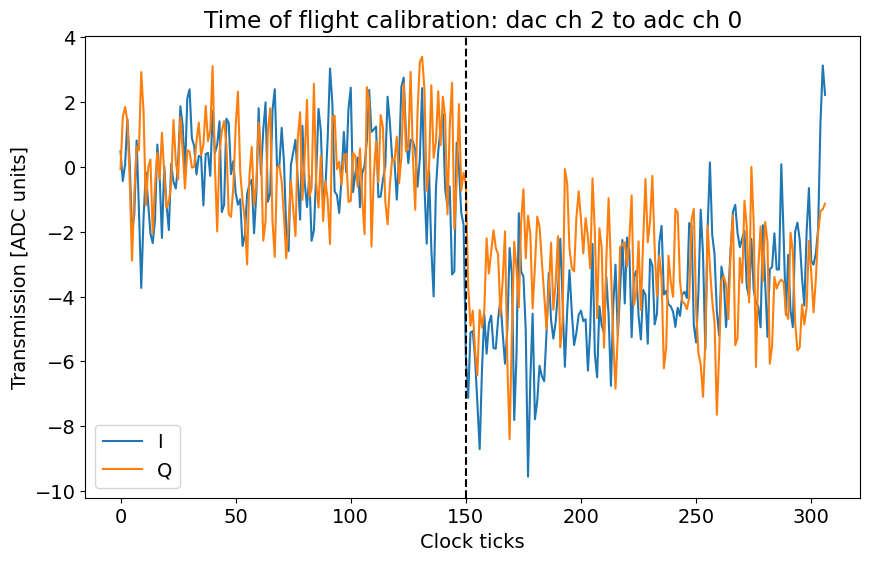

In [2]:
i = 0
tof = cfg.make_tof(soc, expt_path, cfg_path, i)
tof.go(analyze=False, display=False, progress=True, save=True)
tof.display(adc_trig_offset=150) 

## Resonator Spectroscopy 

Run resonator spectroscopy for all resonators by choosing a large frequency scan to look over. The scan will then find the different resonators and fill in the config file with their respective frequencies. In the autocalibration, there will be a finer sweep of each resonator to more accurately find its frequency. The frequencies are saved in <code>auto_cfg.device.readout.frequency</code>

### Coarse 

5.0001161098480225


  0%|          | 0/5000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_04_10\00018_resonator_spectroscopy_coarse.h5
number of peaks: 4


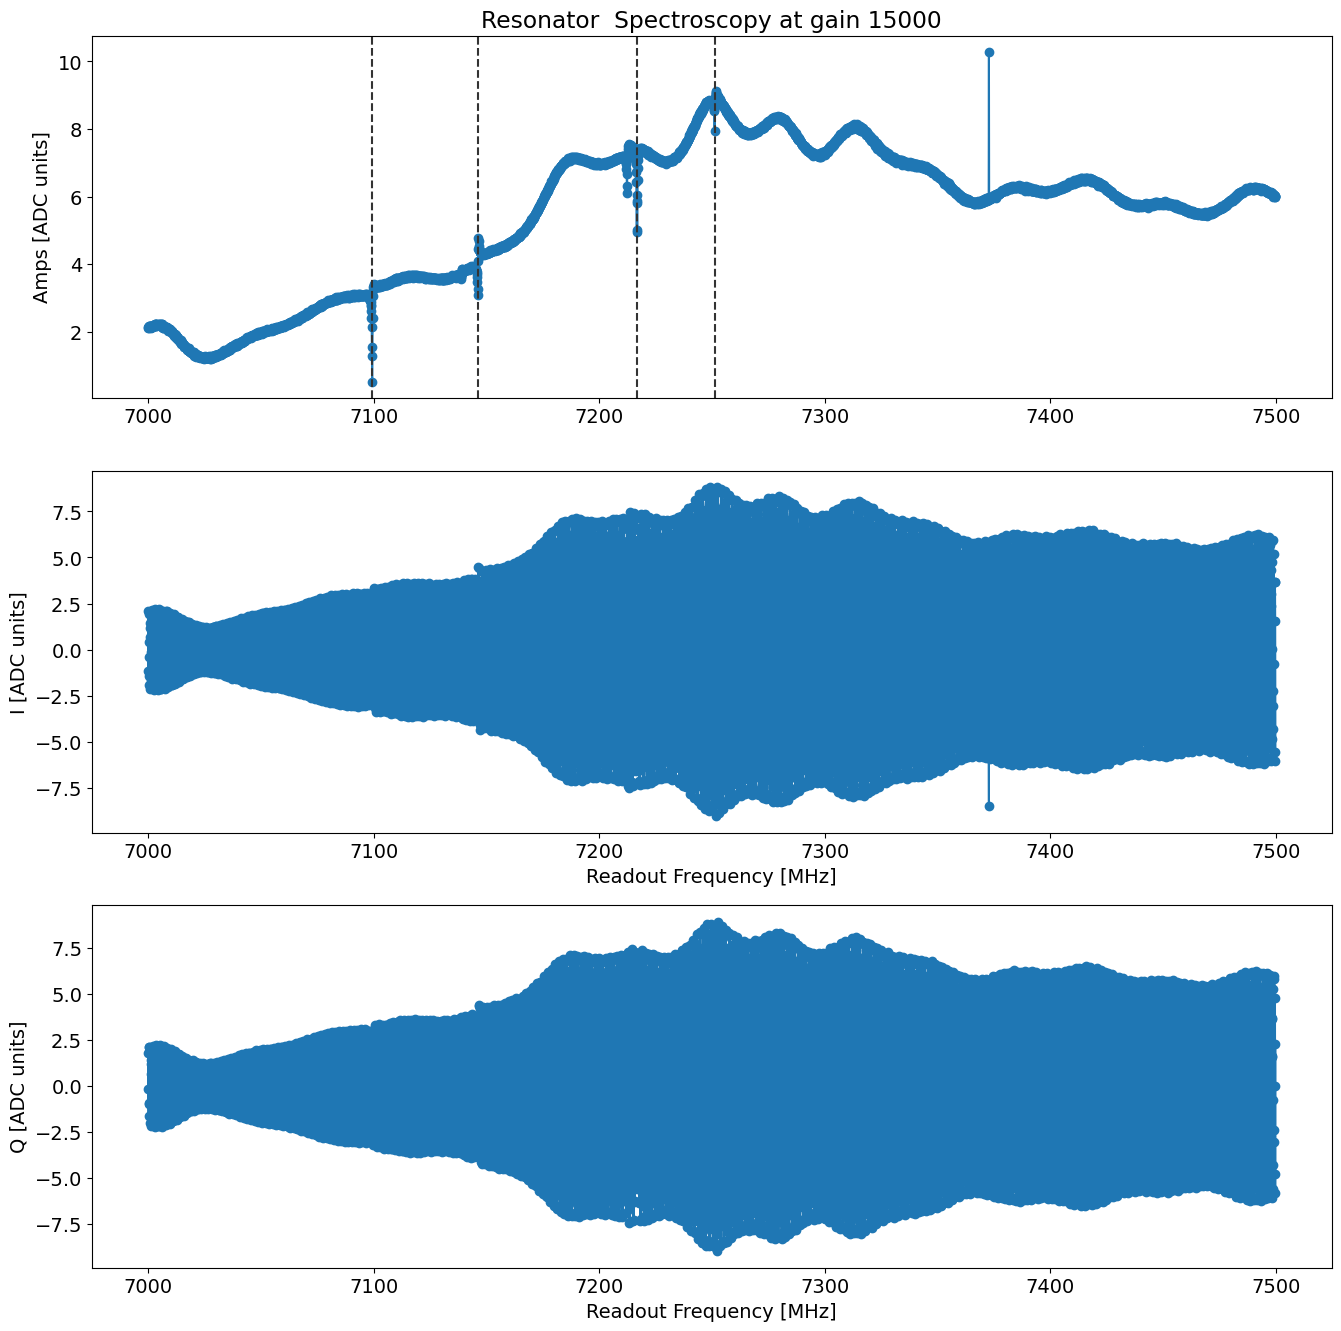

In [9]:
rspec = cfg.make_rspec_coarse(soc, expt_path, cfg_path, i, im=im, start=7000, span=500, reps=2000, npts=5000)
rspec.go(analyze=False, display=False, progress=True, save=True)
rspec.analyze(fit=False, coarse_scan = True)
rspec.display(fit=False, coarse_scan = True)
res_values = rspec.data['coarse_peaks']

number of peaks: 8


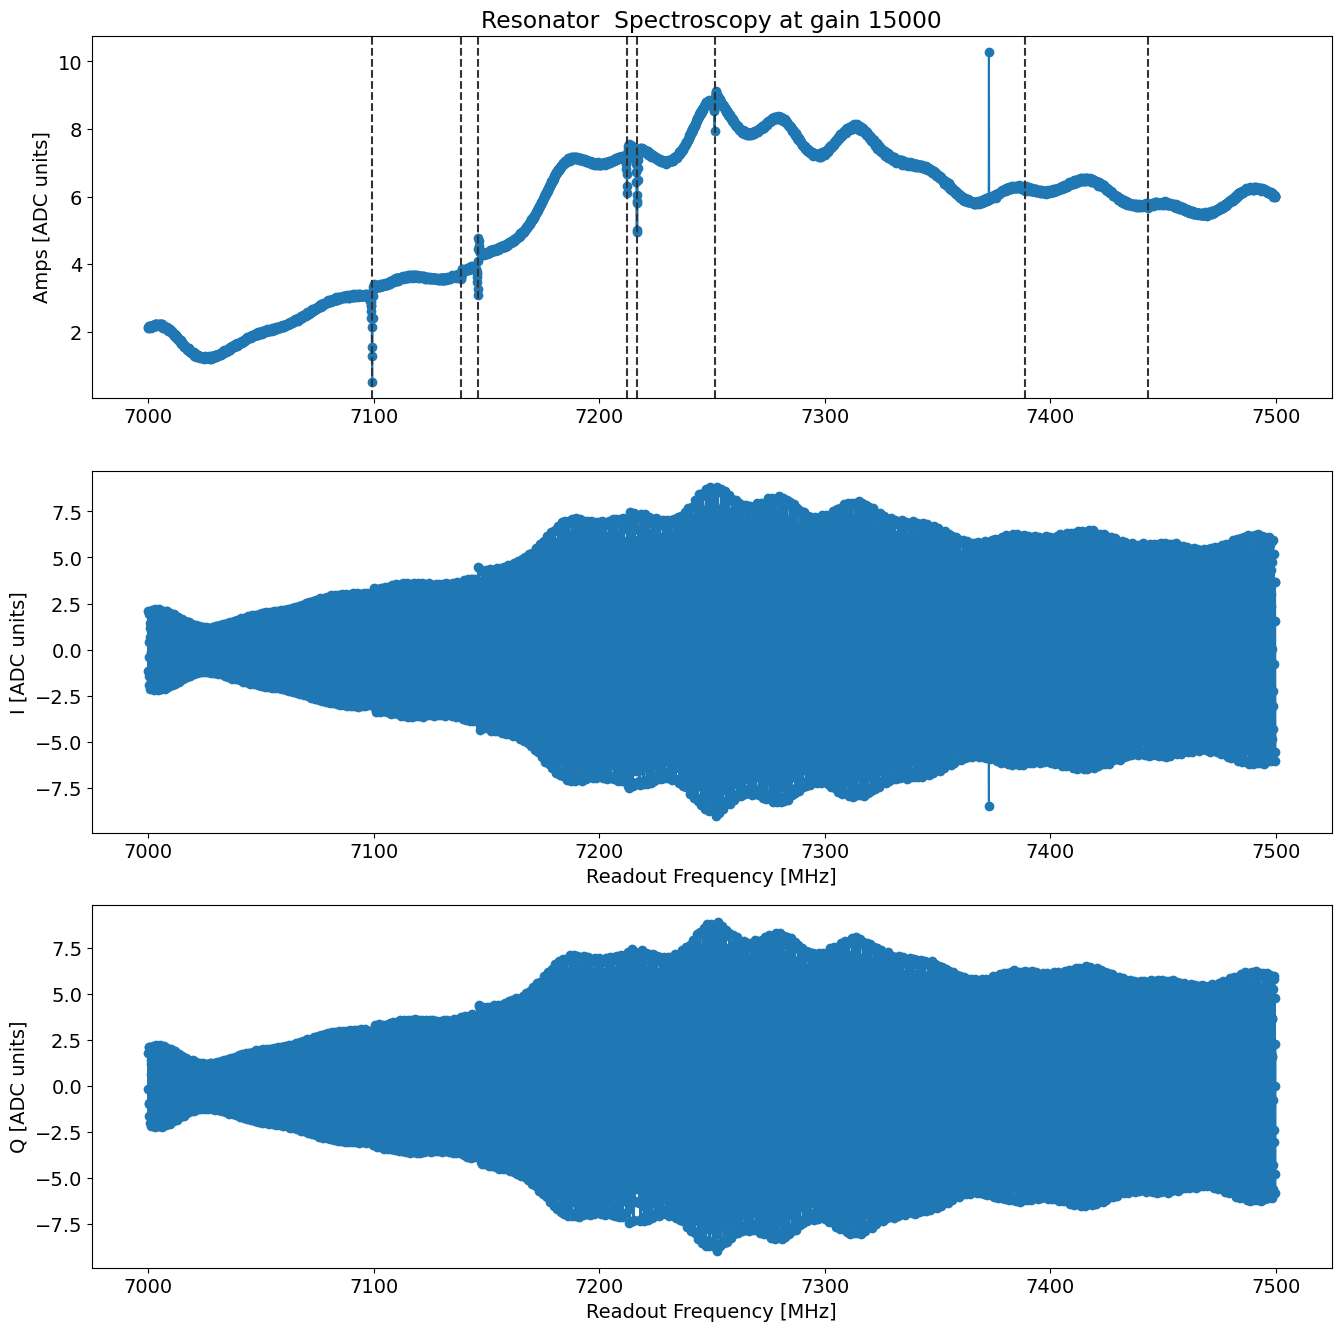

In [13]:
# Optional, play around with the finding peaks: 
rspec.analyze(fit=False, coarse_scan = True)
rspec.display(fit=False, coarse_scan = True)
res_values = rspec.data['coarse_peaks']

### Fine

5.022494554519653


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res0.h5


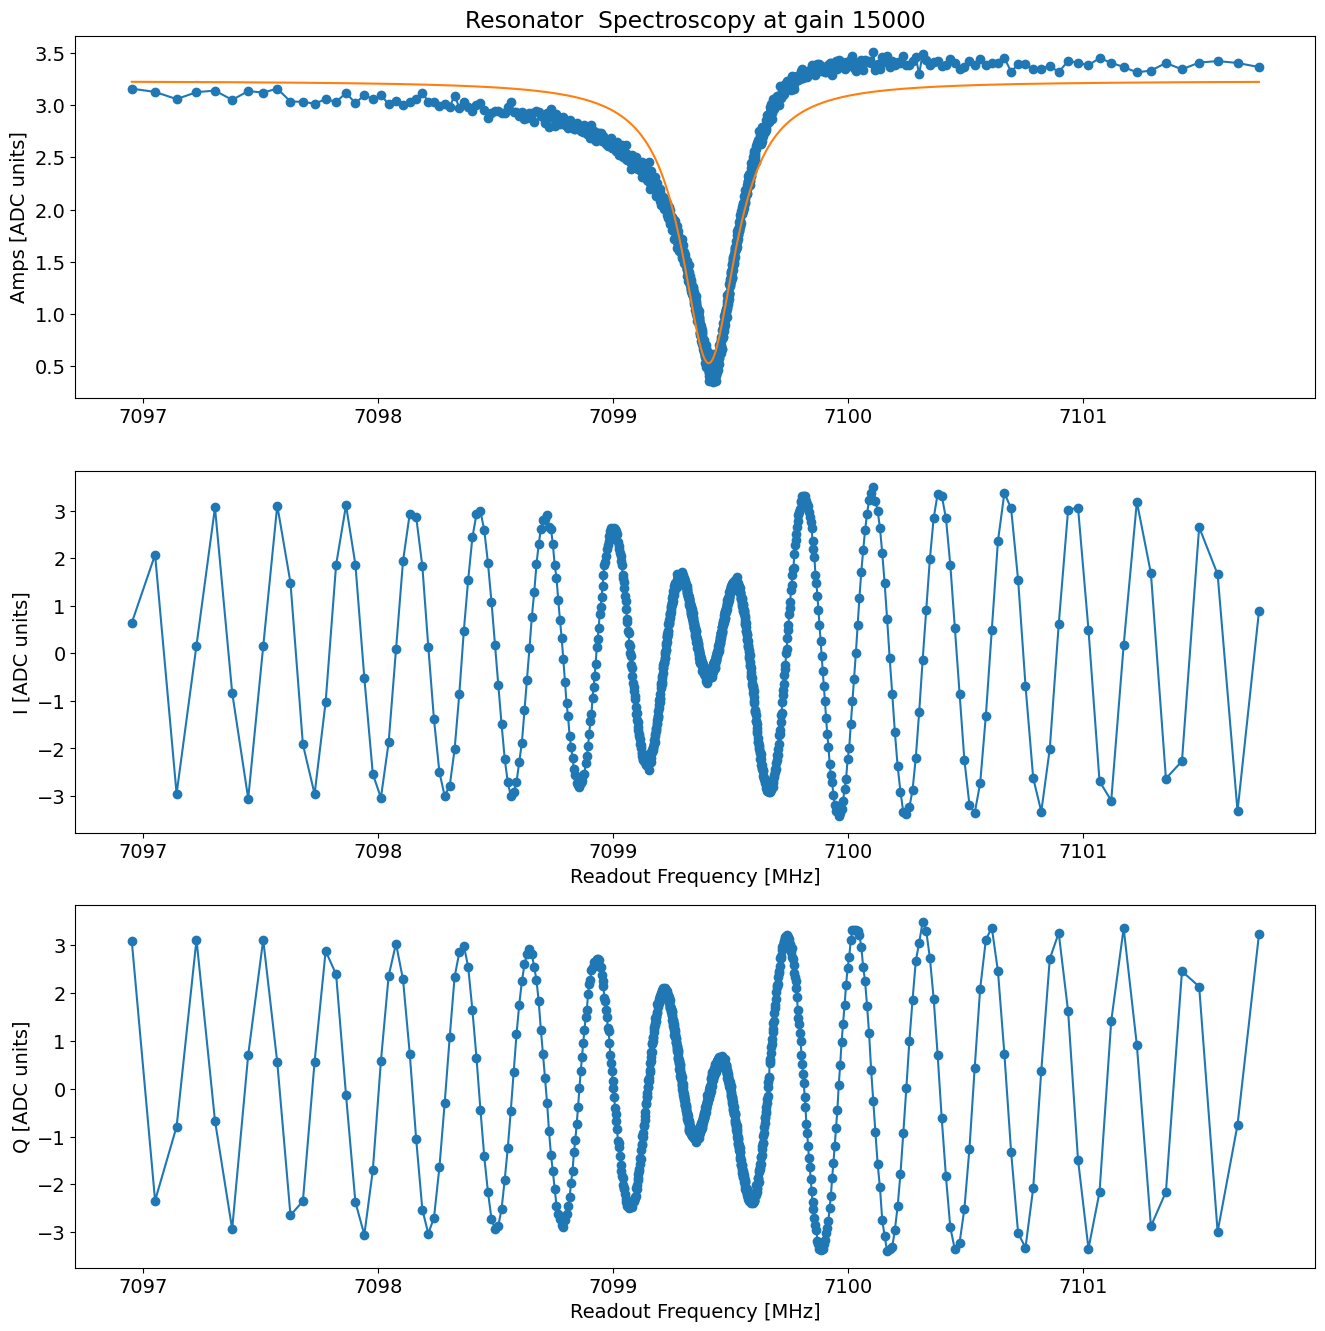

*Set cfg resonator 0 frequency to 7099.40705870269 from 7099.407314972352*
*Set cfg resonator 0 kappa to 0.2802765245445858 from 0*
5.027275800704956


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res1.h5


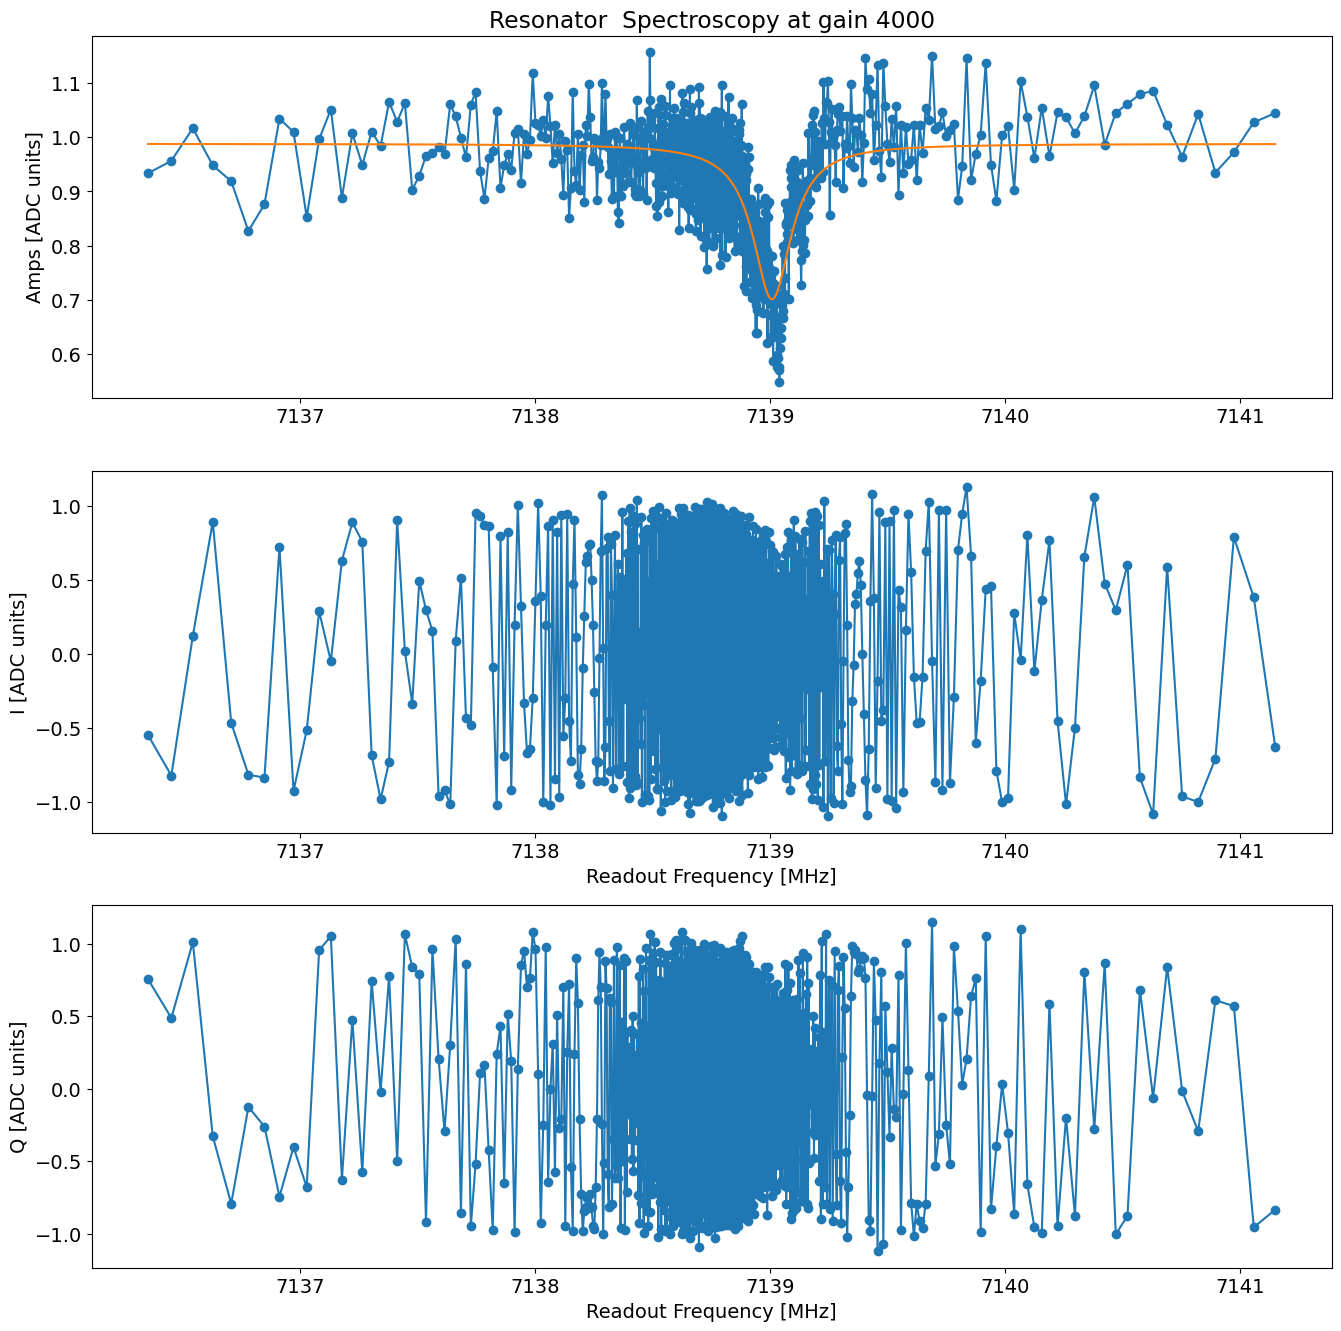

*Set cfg resonator 1 frequency to 7139.0071872378885 from 7137.582485492751*
*Set cfg resonator 1 kappa to 0.1972735864074821 from 0*
5.018458127975464


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res2.h5


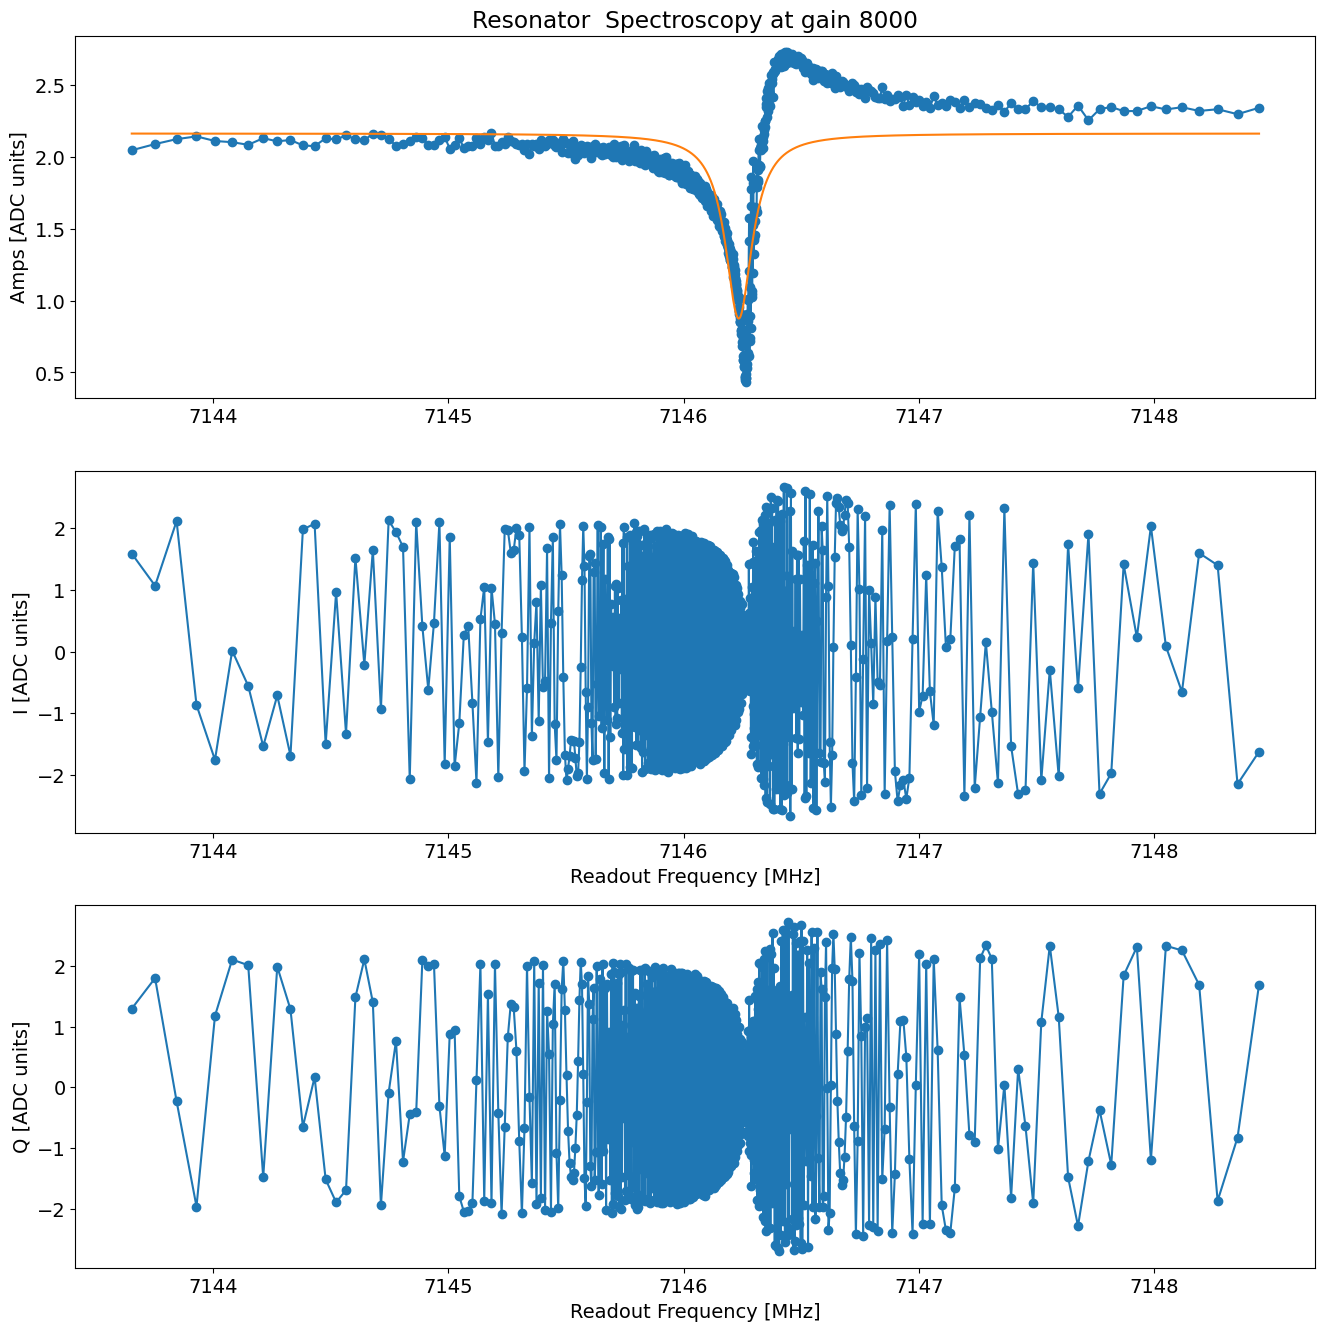

*Set cfg resonator 2 frequency to 7146.234620965896 from 7145.514833831296*
*Set cfg resonator 2 kappa to 0.13947469297542384 from 0*
5.026907682418823


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res3.h5


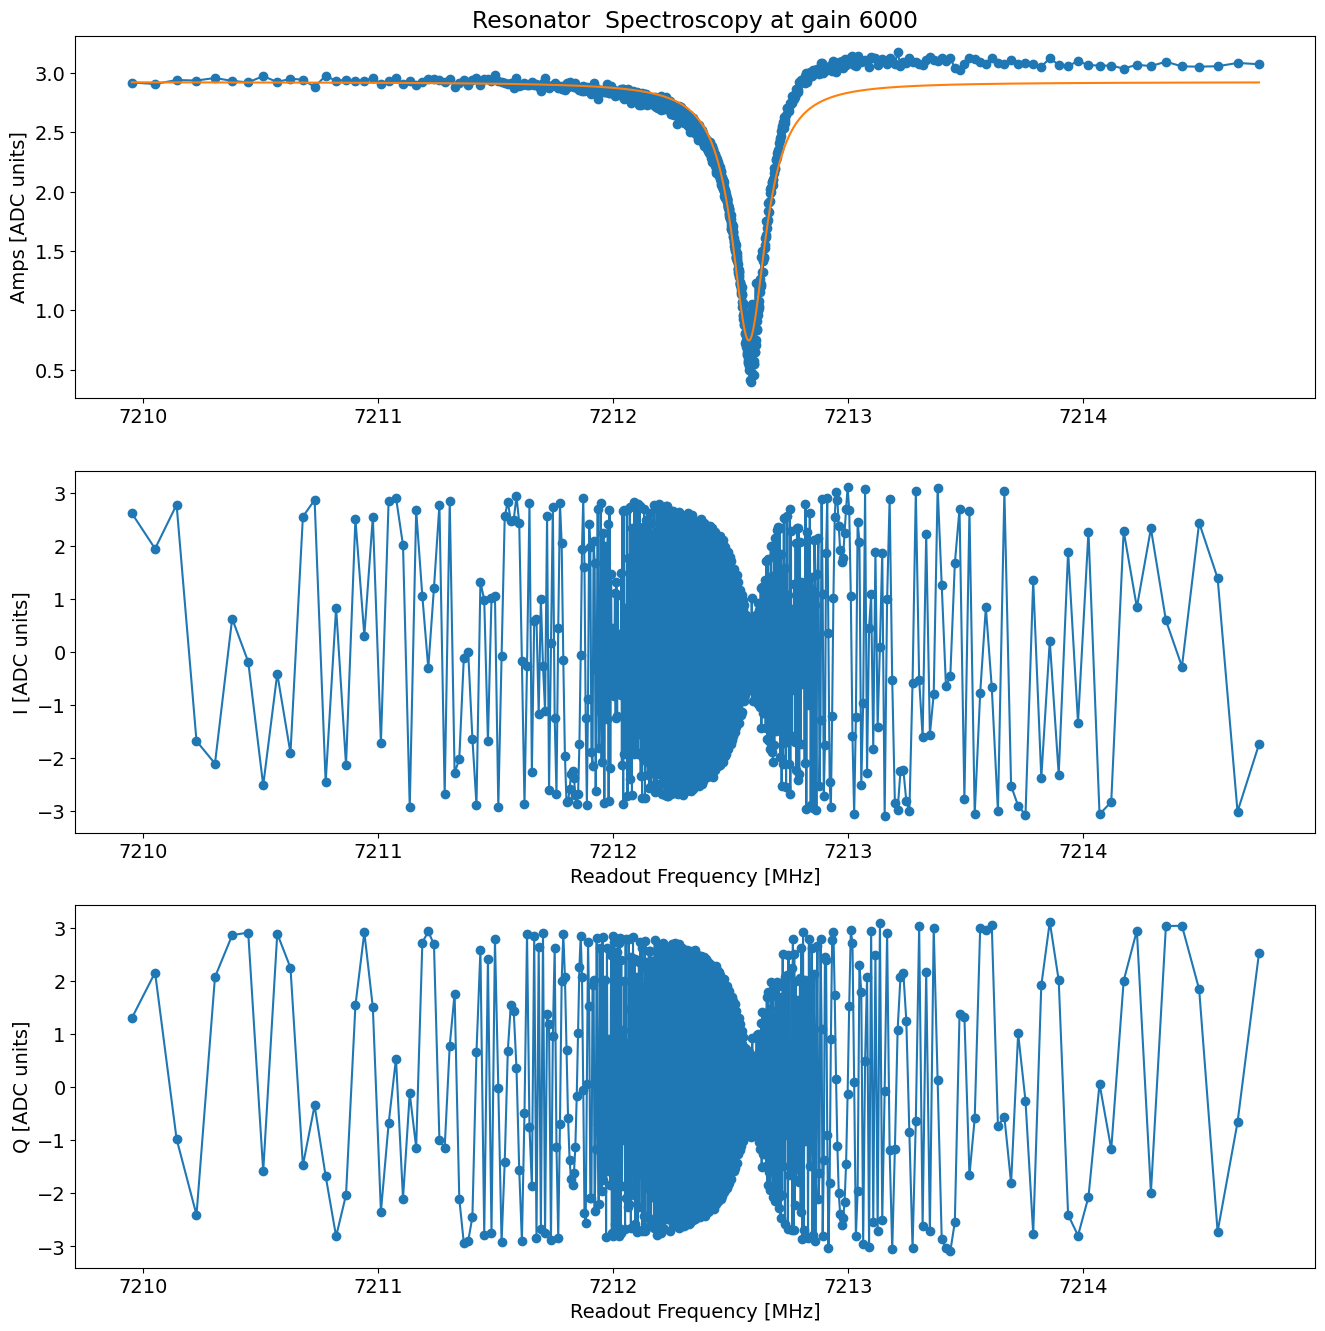

*Set cfg resonator 3 frequency to 7212.577818704508 from 7210.194260332338*
*Set cfg resonator 3 kappa to 0.1755192643974948 from 0*
5.022103309631348


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res4.h5


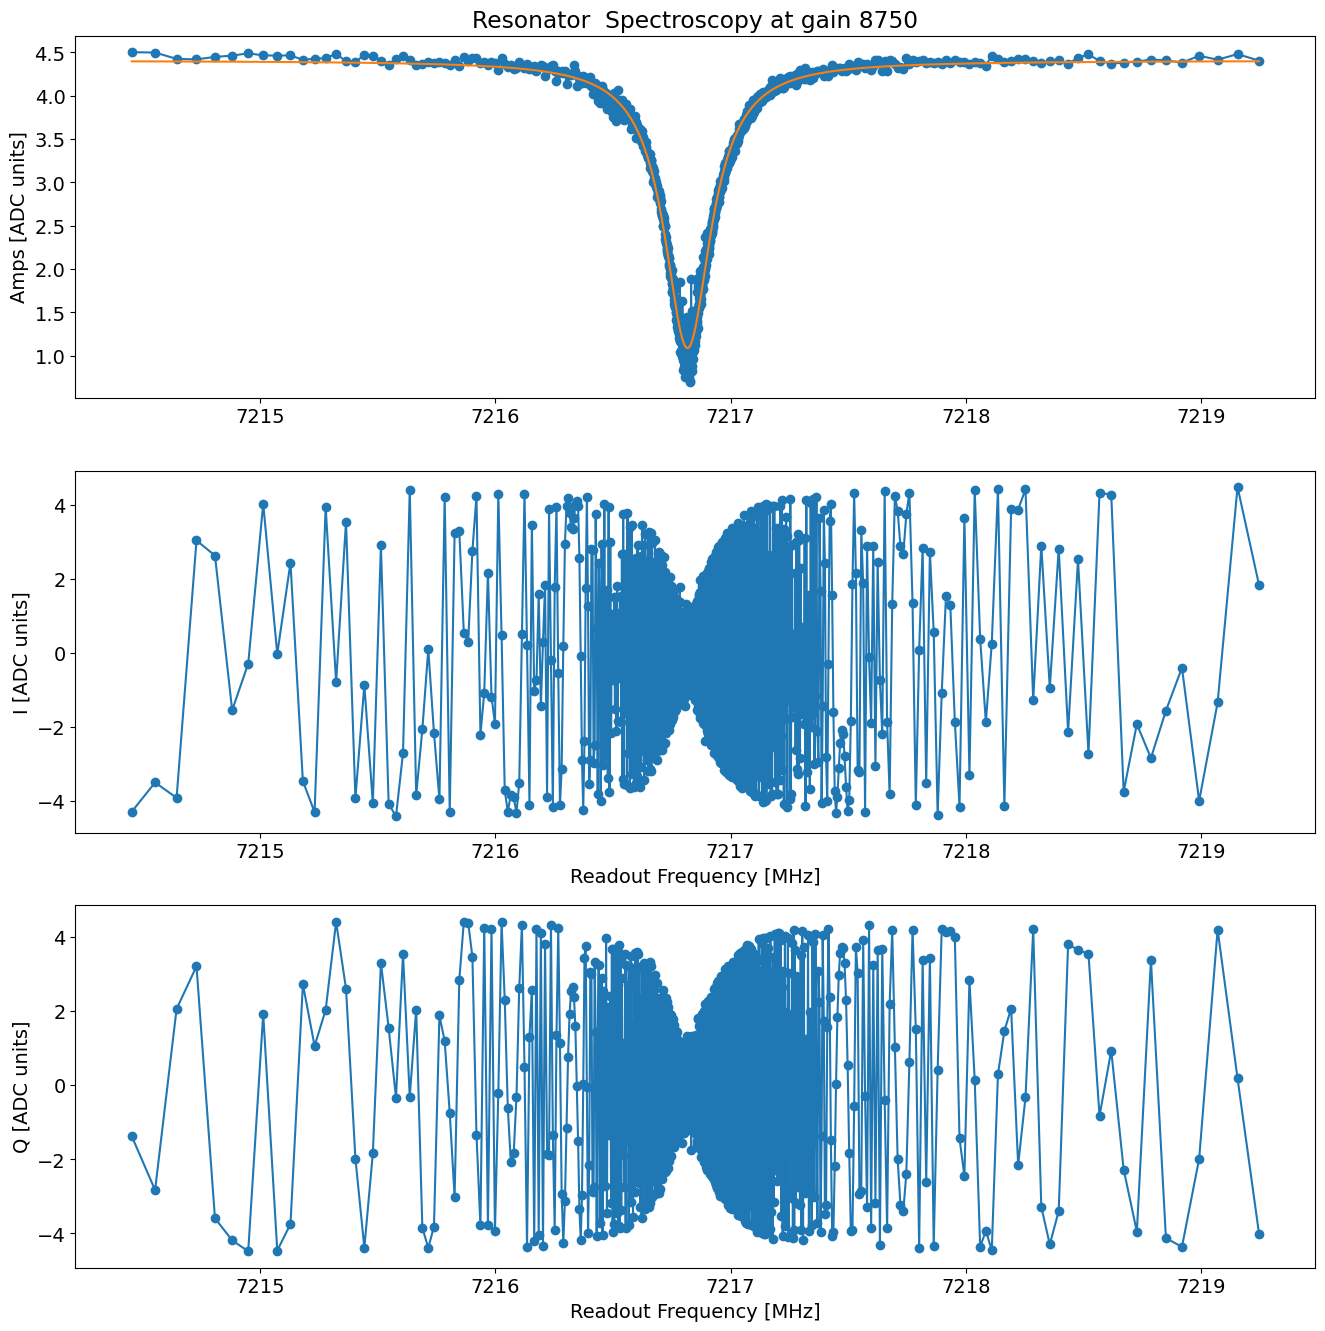

*Set cfg resonator 4 frequency to 7216.816821234878 from 7216.068856495034*
*Set cfg resonator 4 kappa to 0.24201131798242603 from 0*
5.024382829666138


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res5.h5


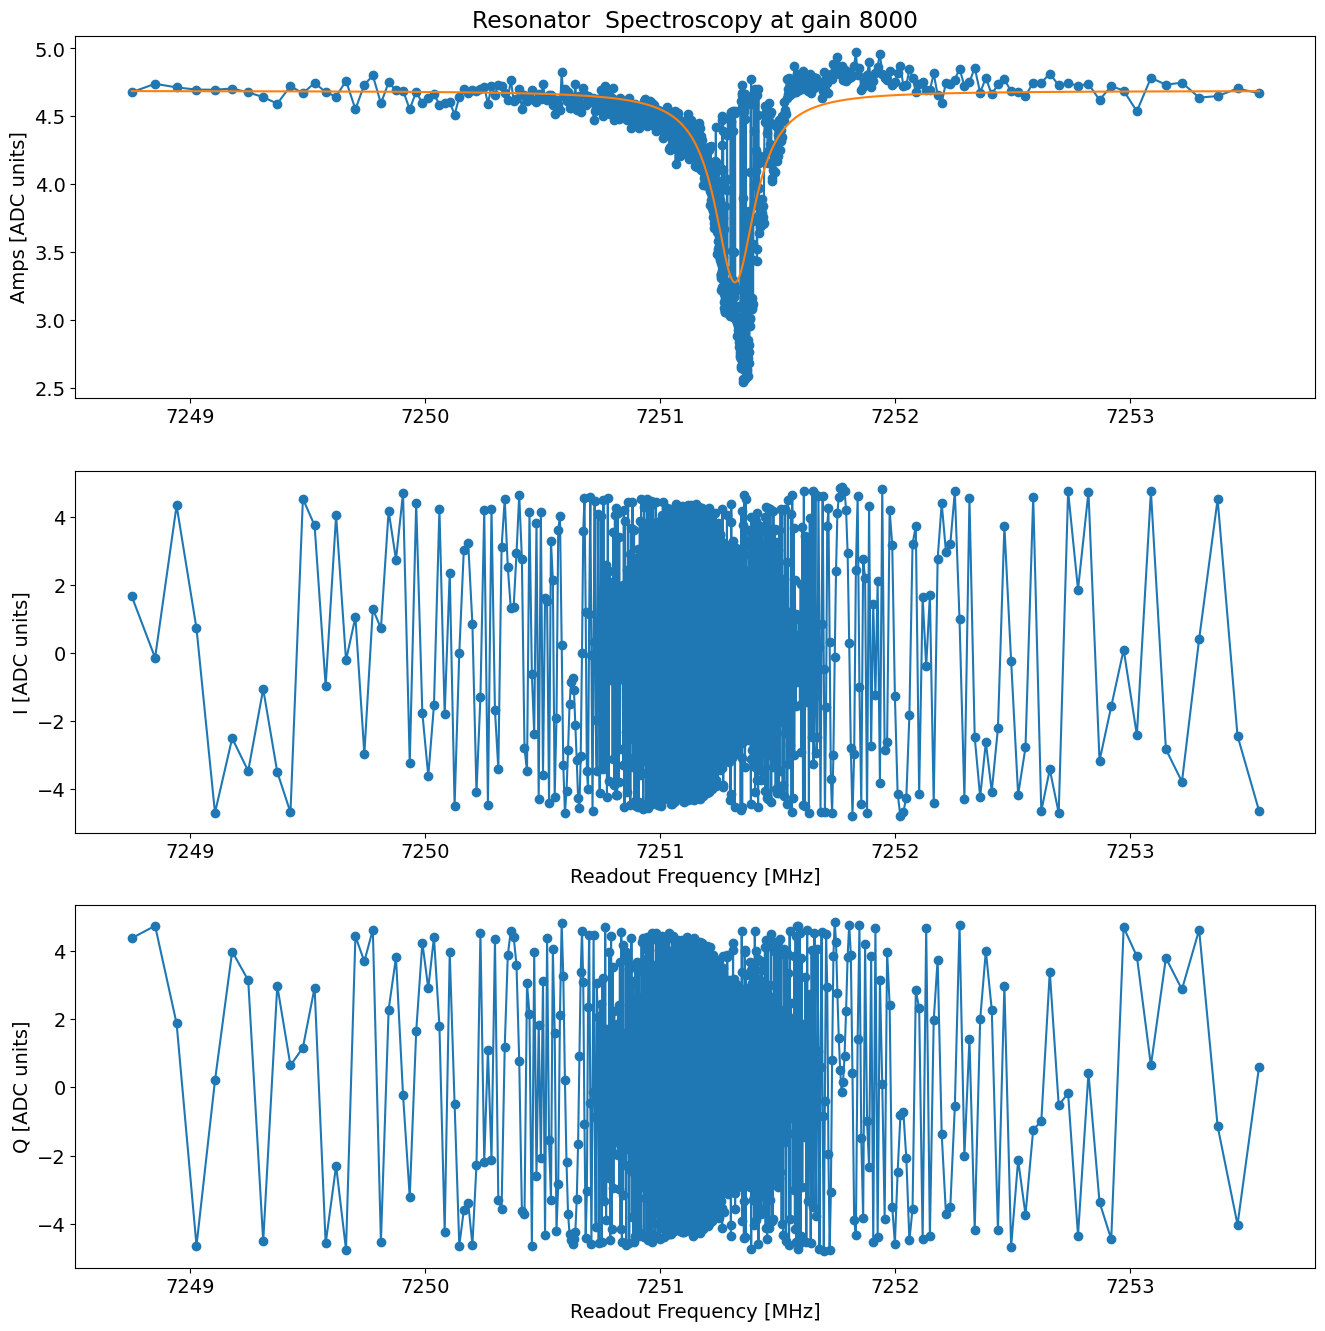

*Set cfg resonator 5 frequency to 7251.318636637718 from 7249.8754434795765*
*Set cfg resonator 5 kappa to 0.20813419290775922 from 0.21144869329929125*
4.995146036148071


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00000_resonator_spectroscopy_res6.h5


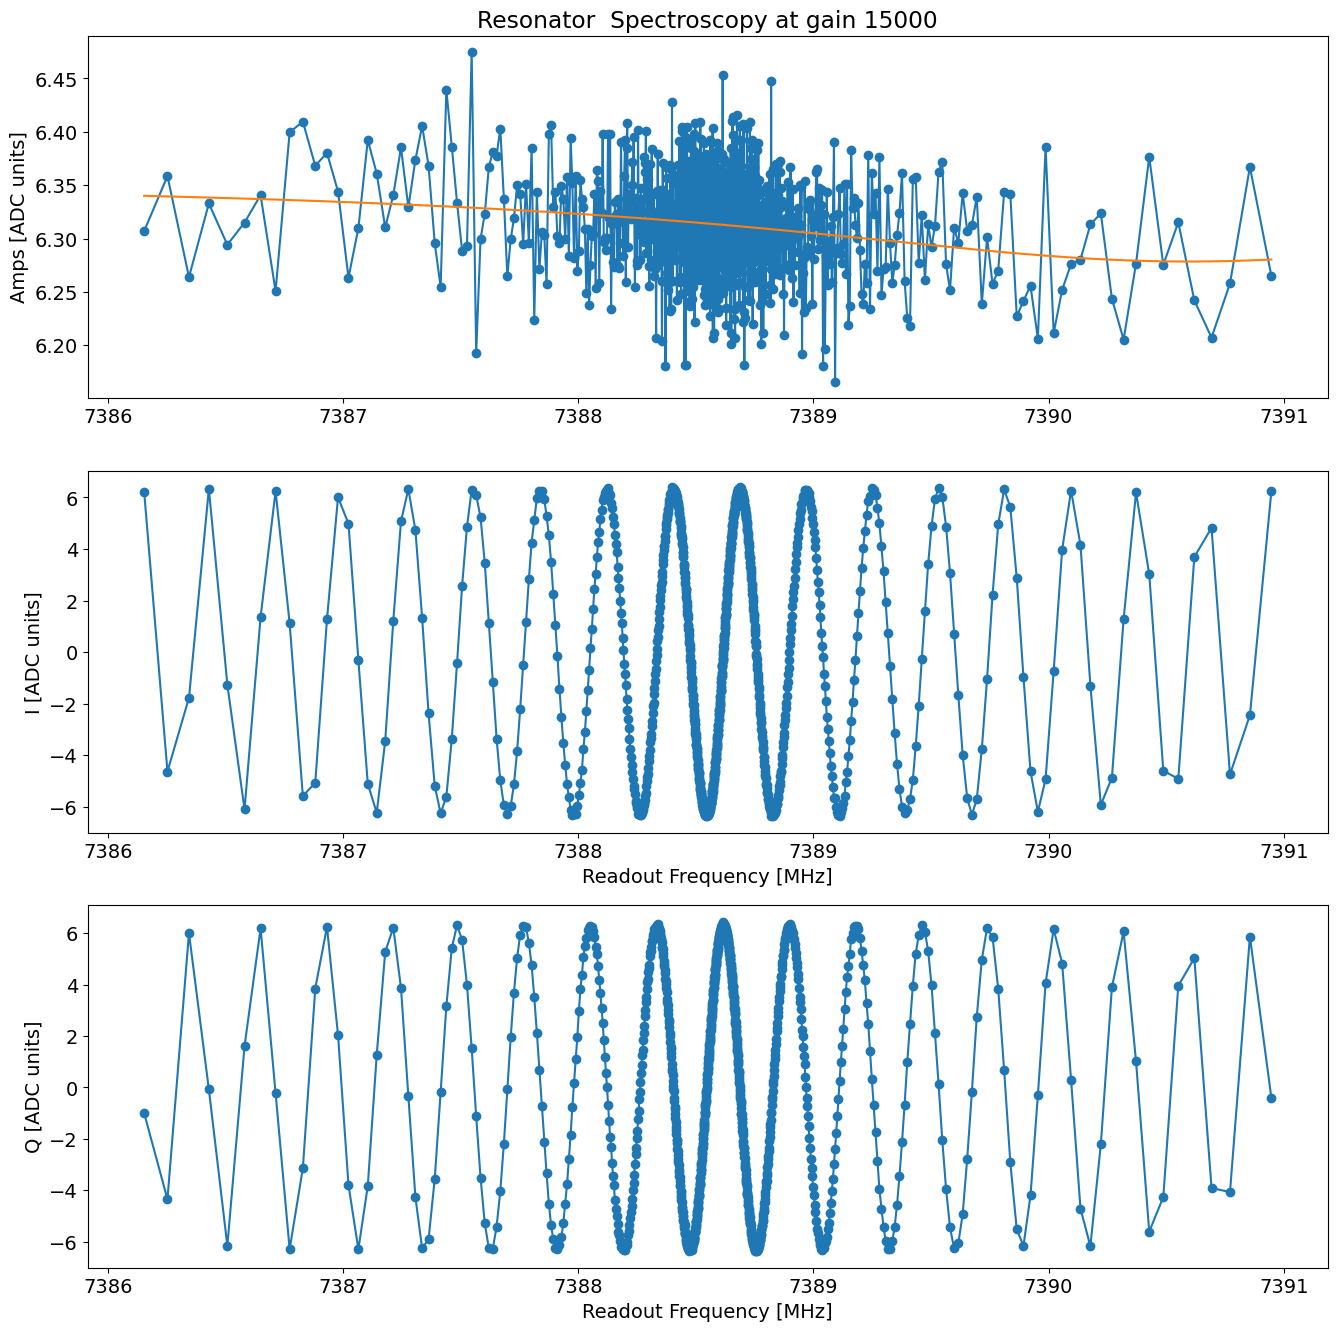

IndexError: list index out of range

In [27]:
# Fine 
for i in range(len(res_values)):
#for i in range(0):
    if i<num_qubits: qubit_i=i
    else: qubit_i=0
    # Next, run the fine scan for each to make sure they are good. 
    rspec = cfg.make_rspec_fine(soc, expt_path, cfg_path, qubit_i, i, im=im, center=res_values[i])
    rspec.go(analyze=True, display=True, progress=True, save=True)
    if i<num_qubits:
        auto_cfg = config.update_readout(cfg_file, 'frequency', float(rspec.data['lorentz_fit'][2]), i)
        auto_cfg = config.update_readout(cfg_file, 'kappa', float(2*rspec.data['lorentz_fit'][3]), i)

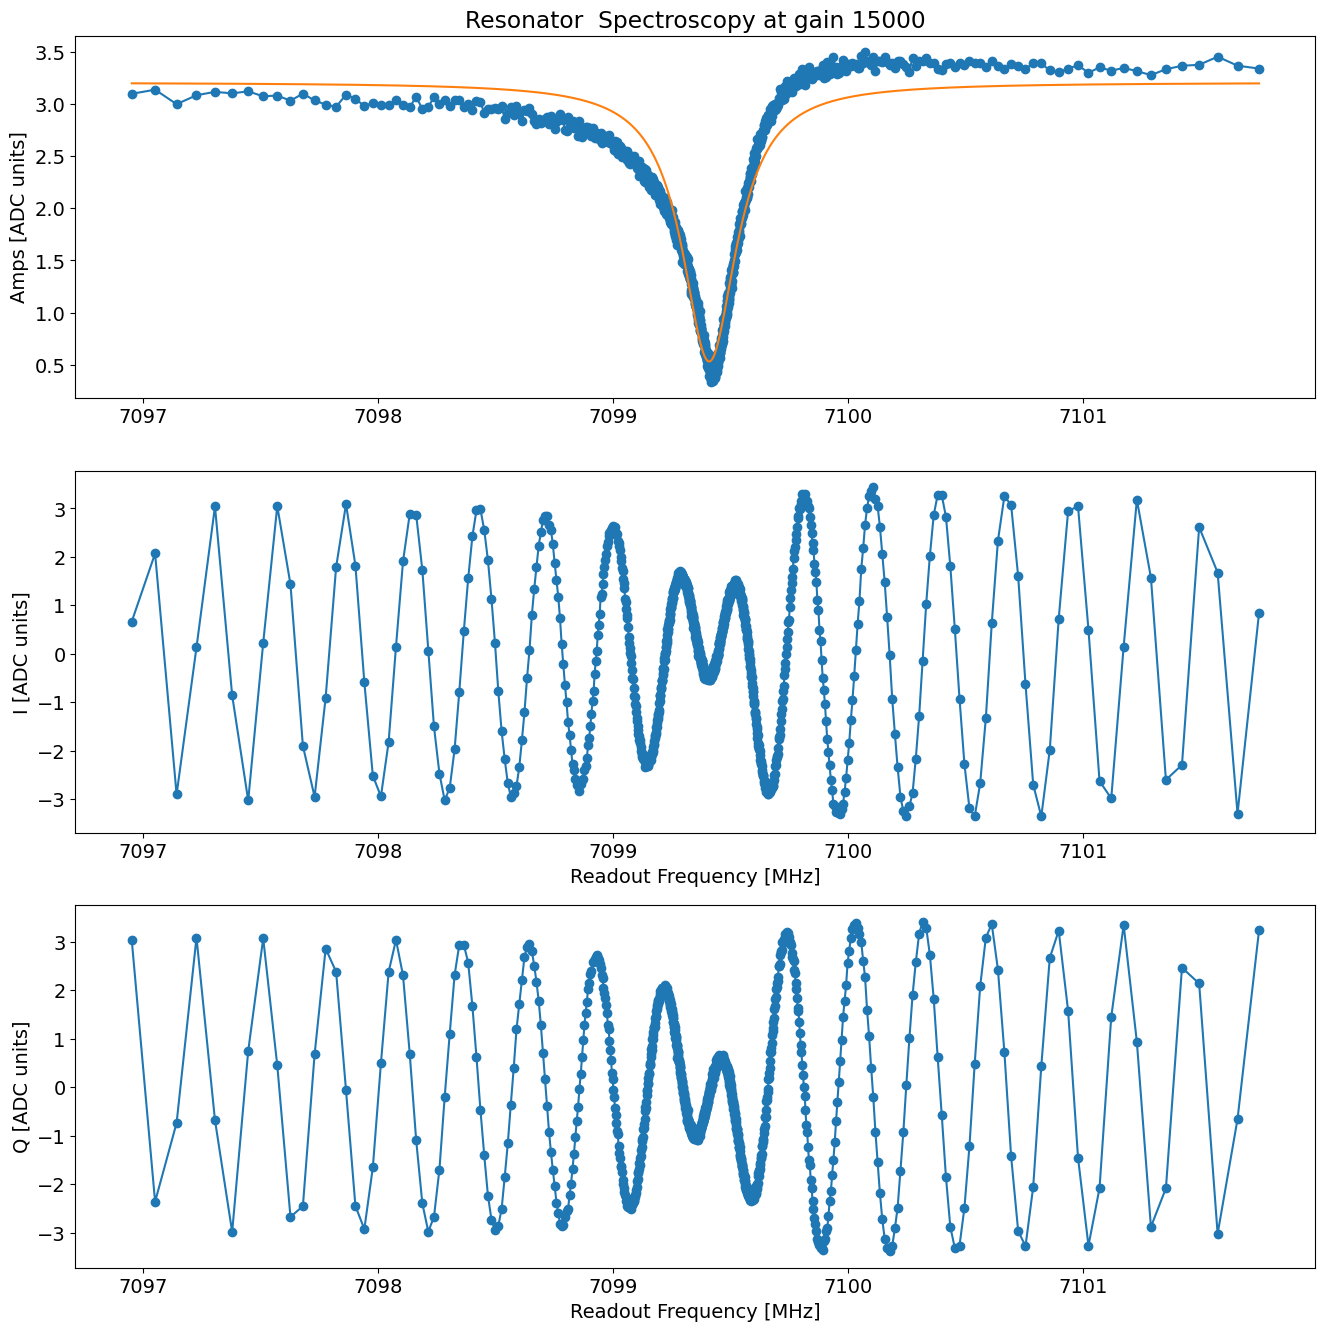

In [21]:
rspec.analyze(fit=True, findpeaks=False, coarse_scan = False)
rspec.display(fit=True, findpeaks=False, coarse_scan = False)

  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_12\00000_resonator_spectroscopy_res5.h5


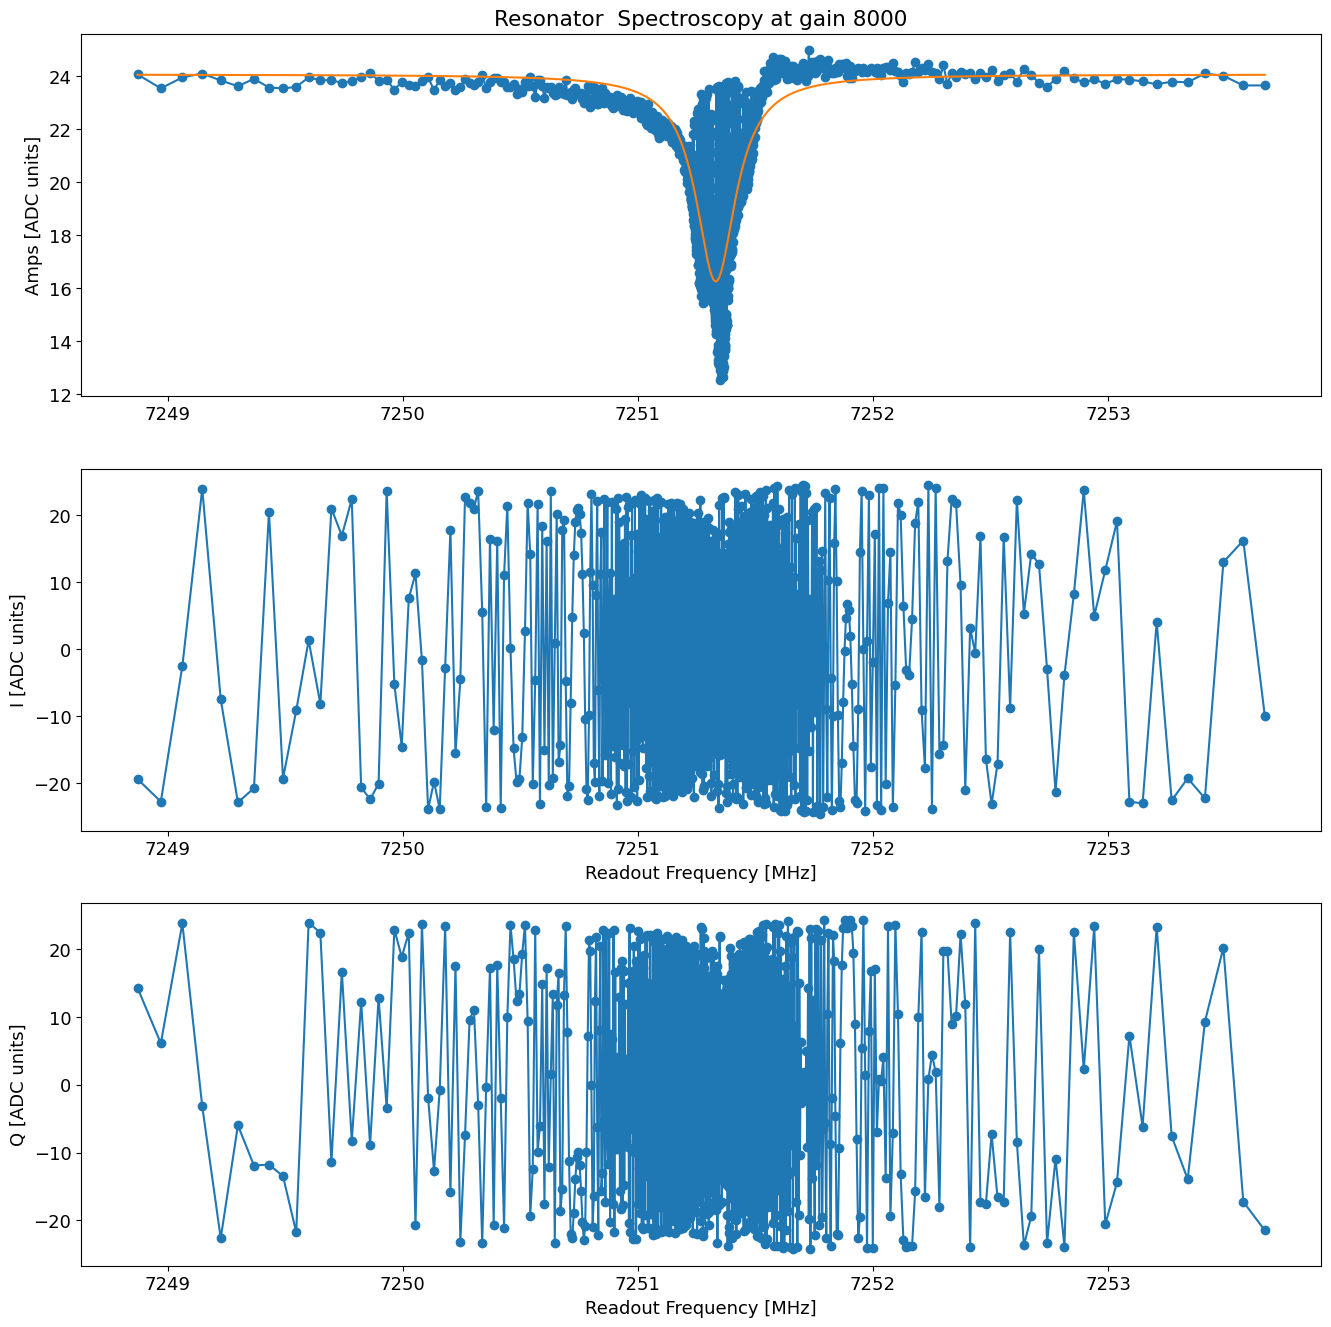

*Set cfg resonator 5 frequency to 7251.331222083031 from 7251.318636637718*
*Set cfg resonator 5 kappa to 0.20593025478295843 from 0.20813419290775922*


In [55]:
# Just run one qubit 
i = 5
#config.update_readout(cfg_file, 'gain', 4000, i)

rspec = cfg.make_rspec_fine(soc, expt_path, cfg_path, i, i, im=im, reps=2000)
rspec.go(analyze=True, display=True, progress=True, save=True)
auto_cfg = config.update_readout(cfg_file, 'frequency', float(rspec.data['lorentz_fit'][2]), i)
auto_cfg = config.update_readout(cfg_file, 'kappa', float(2*rspec.data['lorentz_fit'][3]), i)

If you are okay with the peaks, save data to <code>auto_cfg.device.readout.frequency</code>

### Resonator Power Spectroscopy 

Find a good value for gain to park your readout at until you run readout optimization. From the 2D sweep that is produced, choose a value for gain that is right before the resonator 'breaks' (goes from e -> f). Want to choose a high value for gain because we want to be in the shot noise limited regime which increases our signal:noise ratio. The gain value should be saved in <code>auto_cfg.device.readout.gain</code>

  0%|          | 0/21 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_04_10\00002_ResonatorPowerSweepSpectroscopyExperiment_qubit1.h5


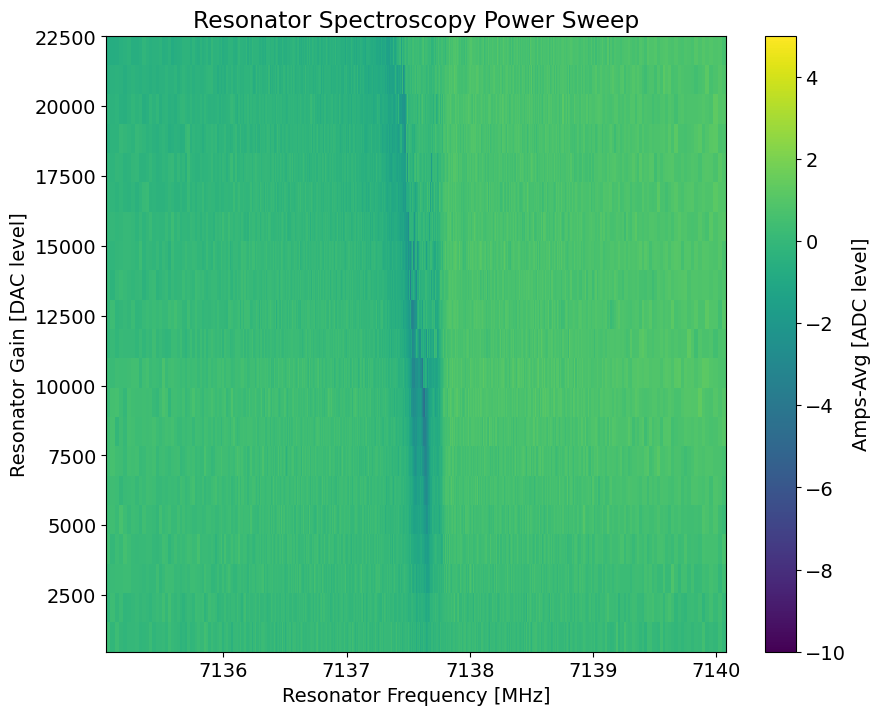

In [83]:
i = 1
rpowspec=cfg.make_rpowspec(soc, expt_path, cfg_path, i, im=im, auto_cfg['device']['readout']['frequency'][i], npts_f=1000, npts_gain=20, start_gain=1000, span_gain=21000, smart=True, reps=2000)
rpowspec.go(analyze=False, display=False, progress=True, save=True)

# Testing 
rpowspec.analyze(fit=False, lowgain=None, highgain=None)
rpowspec.display(fit=False)

In [140]:
# assign the resonator gain to the results config file
gain_values = [12000, 4000, 8000, 6000, 8750, 8000]
for i in range(num_qubits):
    auto_cfg = config.update_readout(cfg_file, 'gain', int(gain_values[i]), i)

*Set cfg resonator 0 gain to 12000*
*Set cfg res 0 gain to 12000*
*Set cfg resonator 1 gain to 4000*
*Set cfg res 1 gain to 4000*
*Set cfg resonator 2 gain to 8000*
*Set cfg res 2 gain to 8000*
*Set cfg resonator 3 gain to 6000*
*Set cfg res 3 gain to 6000*
*Set cfg resonator 4 gain to 8750*
*Set cfg res 4 gain to 8750*
*Set cfg resonator 5 gain to 8000*
*Set cfg res 5 gain to 8000*


## Qubit Spectroscopy

### Coarse

High power and wide

Running qubit spectroscopy for qubit 1


  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_12\00003_qubit_spectroscopy_coarse_qubit1.h5


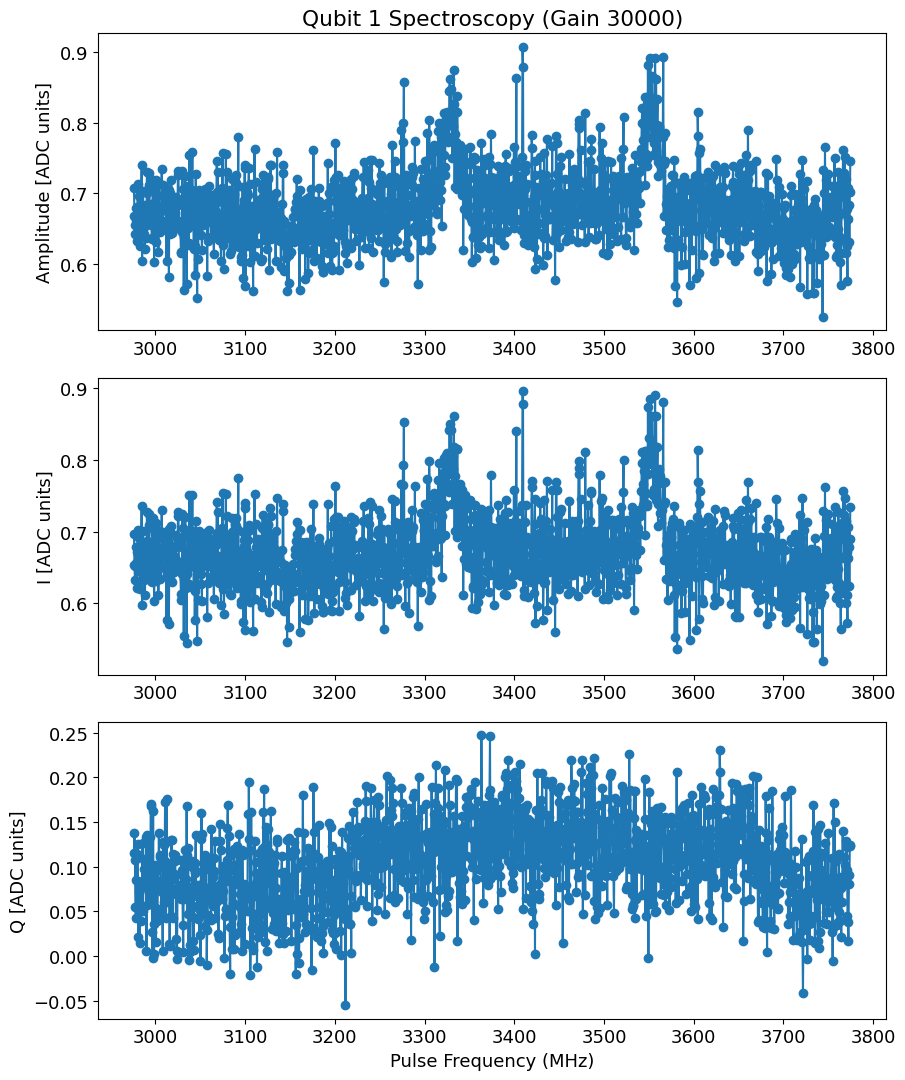

In [112]:
# You may want to update this frequency, which will be the center of the scan. 
#auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(3300), i)
i=1
print('Running qubit spectroscopy for qubit', i)
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, im=im, coarse=True, gain=30000)
qspec.go(analyze=False, display=False, progress=True, save=True)

qspec.analyze(fit=False, coarse=True)
qspec.display(fit=False, coarse=True)

Found peak in amps at [MHz] 3310.1103863021085
Found peak in amps at [MHz] 3391.1770529687756
Found peak in amps at [MHz] 3570.9103863021087


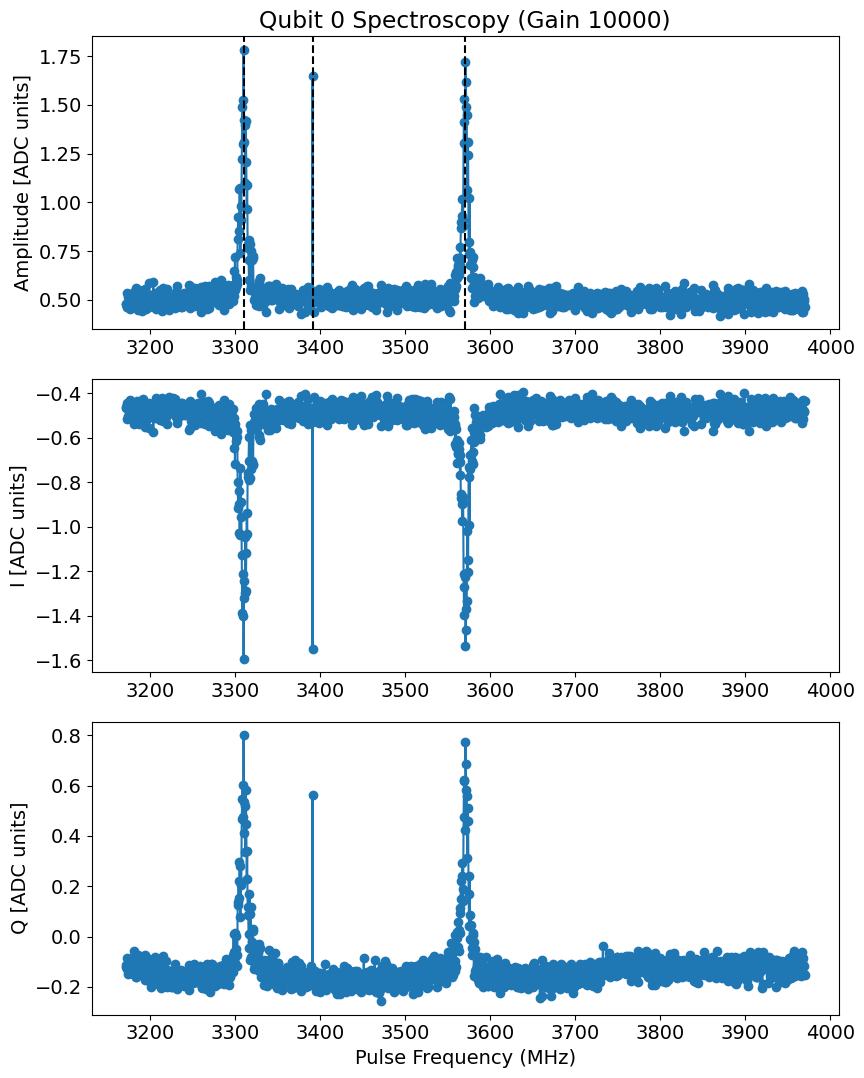

In [42]:
qspec.analyze(fit=False, coarse=True)
qspec.display(fit=False, coarse=True)

#### Updating frequencies 

In [108]:
# Here, choose which peak you want to save the value for, adjust index accordingly

auto_cfg = config.update_qubit(cfg_file, 'f_ef', float(qspec.data["coarse_peaks_x"][0]), i)
auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(qspec.data["coarse_peaks_x"][1]), i)

*Set cfg qubit 2 f_ef to 3347.023265203689 from 4000*
*Set cfg qubit 2 f_ge to 3534.2232652036887 from 3347.556598537022*


### Medium 
(choose your own gain, span)

  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_12\00006_qubit_spectroscopy_coarse_qubit1.h5


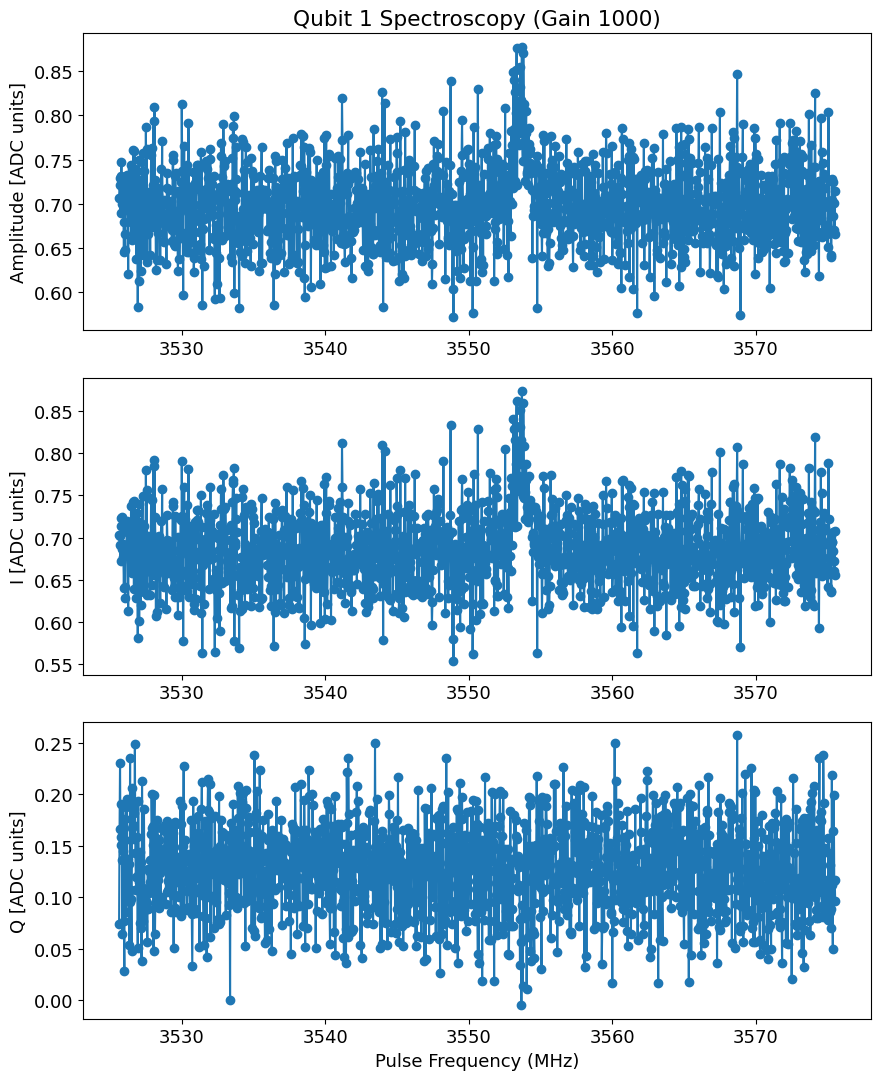

In [116]:
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, im=im, coarse=True,span=50, gain=1000)
qspec.go(analyze=False, display=False, progress=True, save=True)

qspec.analyze(fit=False, coarse=True)
qspec.display(fit=False, coarse=True)

### Fine

  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_12\00008_qubit_spectroscopy_coarse_qubit1.h5
Found peak in amps at [MHz] 3553.5809232484035, HWHM 0.5017074256485577
Found peak in I at [MHz] 3553.5806339146916, HWHM 0.49686748326938646
Found peak in Q at [MHz] 3552.85512651107, HWHM -0.0036655175803607712


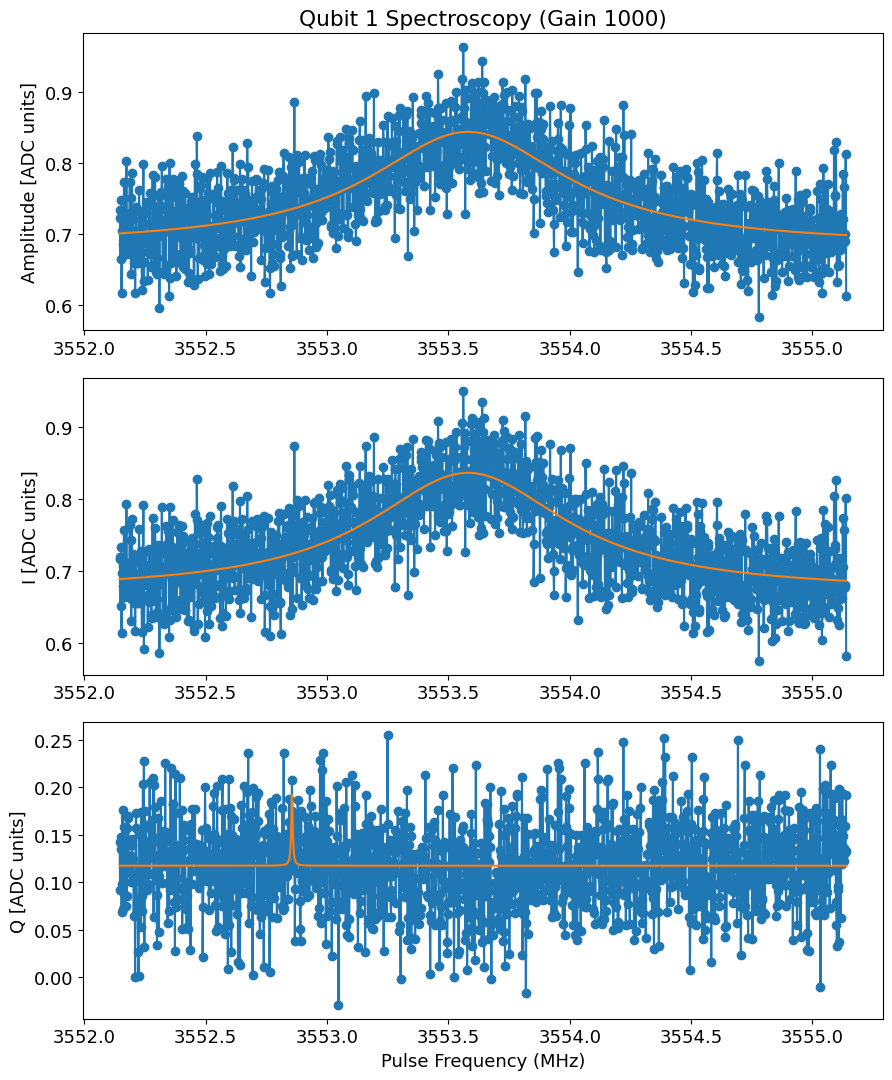

*Set cfg qubit 1 f_ge to 3552.85512651107 from 3553.6428602622686*
*Set cfg qubit 1 kappa to -0.0073310351607215425 from 0.07699207400234231*


In [119]:
# Fine 
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, im=im, gain=1000)
qspec.go(analyze=False, display=False, progress=True, save=True)

qspec.analyze(fit=True, signs = [1,-1,-1])
qspec.display(fit=True, signs= [1, -1, -1])


In [120]:
auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(qspec.data["fit_amps"][2]), i)
auto_cfg = config.update_qubit(cfg_file, 'kappa', float(2*qspec.data["fit_amps"][3]), i)

*Set cfg qubit 1 f_ge to 3553.5809232484035 from 3552.85512651107*
*Set cfg qubit 1 kappa to 1.0034148512971155 from -0.0073310351607215425*


### EF Spectroscopy

#### Coarse

  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_12\00019_qubit_spectroscopy_coarse_qubit5.h5
Found peak in amps at [MHz] 2660.55
Found peak in amps at [MHz] 2680.95
Found peak in amps at [MHz] 2698.35
Found peak in amps at [MHz] 2719.95
Found peak in amps at [MHz] 2737.35
Found peak in amps at [MHz] 2762.55
Found peak in amps at [MHz] 2790.45
Found peak in amps at [MHz] 2815.95
Found peak in amps at [MHz] 2838.45
Found peak in amps at [MHz] 2853.45
Found peak in amps at [MHz] 2873.55
Found peak in amps at [MHz] 2895.15
Found peak in amps at [MHz] 2918.55
Found peak in amps at [MHz] 2944.95
Found peak in amps at [MHz] 2971.65
Found peak in amps at [MHz] 3001.65
Found peak in amps at [MHz] 3049.65
Found peak in amps at [MHz] 3067.95
Found peak in amps at [MHz] 3085.35
Found peak in amps at [MHz] 2918.255155162263, HWHM 24214.416961940005
Found peak in I at [MHz] 2917.2904960737683, HWHM 22357.647267222448
Found peak in Q at [MHz] 2669.8951388740525, HWHM 21.922820496470965


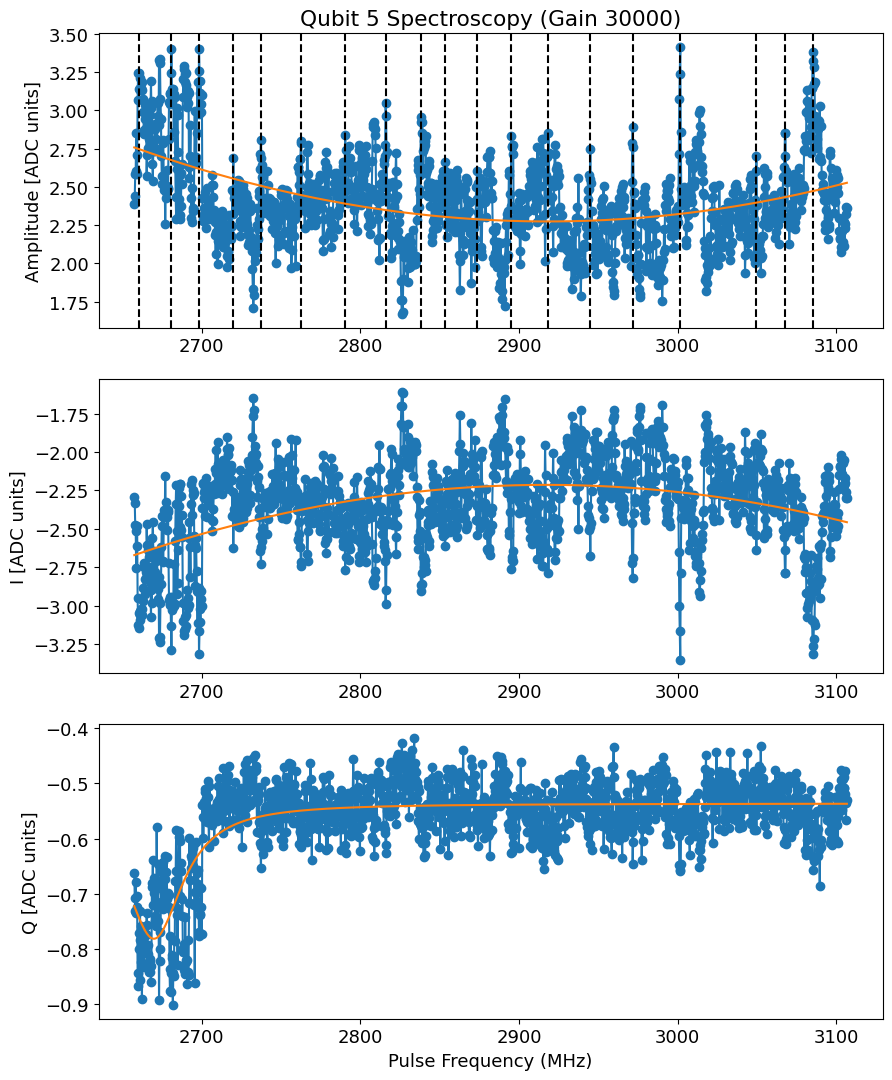

In [98]:
# EF spectroscopy coarse 
# First set your guess of where it will be 

#auto_cfg = config.update_qubit(cfg_file, 'f_ef', auto_cfg['device']['qubit]['f_ge']-250), i)
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, im=im, ef=True, coarse=True, gain=30000)
qspec.go(analyze=False, display=False, progress=True, save=True)

qspec.analyze(fit=True, coarse=True)
qspec.display(fit=True, coarse=True)

#### Fine

In [123]:
# EF spectroscopy fine 
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, im=im, ef=True)
qspec.go(analyze=False, display=False, progress=True, save=True)
qspec.analyze(fit=True, coarse=False)
qspec.display(fit=True, coarse=False)


TypeError: make_qspec() got an unexpected keyword argument 'im'

In [122]:
auto_cfg = config.update_qubit(cfg_file, 'f_ef', float(qspec.data["fit_amps"][2]), i)

*Set cfg qubit 1 f_ef to 3327.676866095101 from 3320*


### Medium

  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_12\00009_qubit_spectroscopy_coarse_qubit1.h5
Found peak in amps at [MHz] 3327.676866095101, HWHM -0.3974022718520706
Found peak in I at [MHz] 3327.678952787234, HWHM -0.40386236362112327
Found peak in Q at [MHz] 3327.7690506709546, HWHM 0.4873645783063382


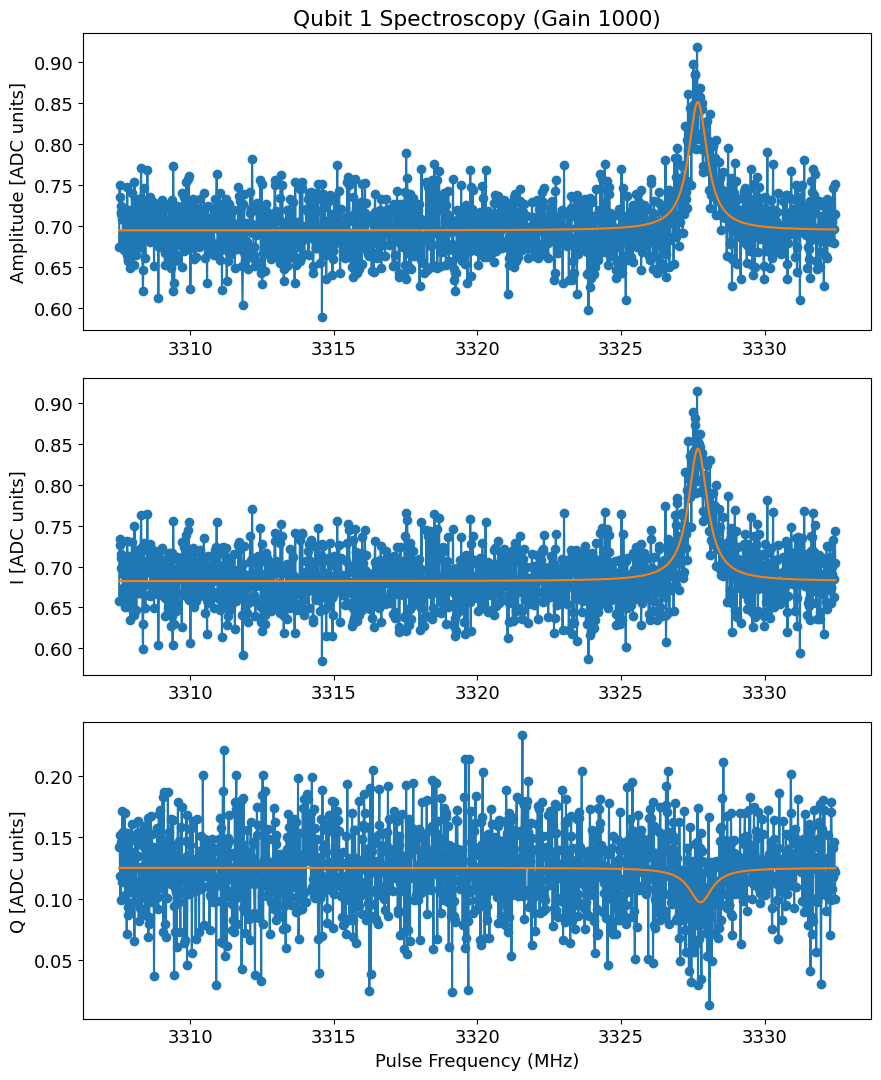

In [121]:
# EF spectroscopy fine 
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, im=im, ef=True, gain=1000, reps=100, span=25)
qspec.go(analyze=False, display=False, progress=True, save=True)
qspec.analyze(fit=True, coarse=False)
qspec.display(fit=True, coarse=False)

In [91]:

#auto_cfg = config.update_qubit(cfg_file, 'f_ef', float(qspec.data["fit_amps"][2]), i)
auto_cfg = config.update_qubit(cfg_file, 'f_ef', float(2882.25), i)

*Set cfg qubit 5 f_ef to 2882.25 from 2883.0*


## Coherent scans

### Rabi

In [69]:
# We don't need this for initial tuning 
lengthrabi = cfg.make_lengthrabi(soc, expt_path, cfg_path, i, gain=15000)
lengthrabi.go(analyze=True, display=True, progress=True, save=True)

auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ge','sigma'), float(lengthrabi.data['pi_length']), i)

TypeError: LengthRabiExperiment.__init__() got an unexpected keyword argument 'im'

qTest sigma =  0.2
gauss


  0%|          | 0/50000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_12\00005_amp_rabi_qubit5.h5
Pi gain from amps data [dac units]: 21001
	Pi/2 gain from amps data [dac units]: 10500
Pi gain from avgi data [dac units]: 21023
	Pi/2 gain from avgi data [dac units]: 10511
Pi gain from avgq data [dac units]: 63902
	Pi/2 gain from avgq data [dac units]: 31951


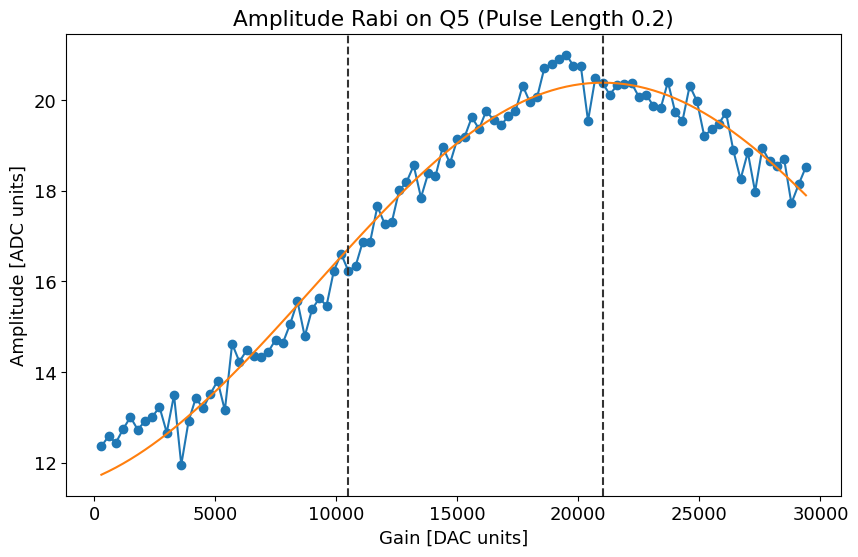

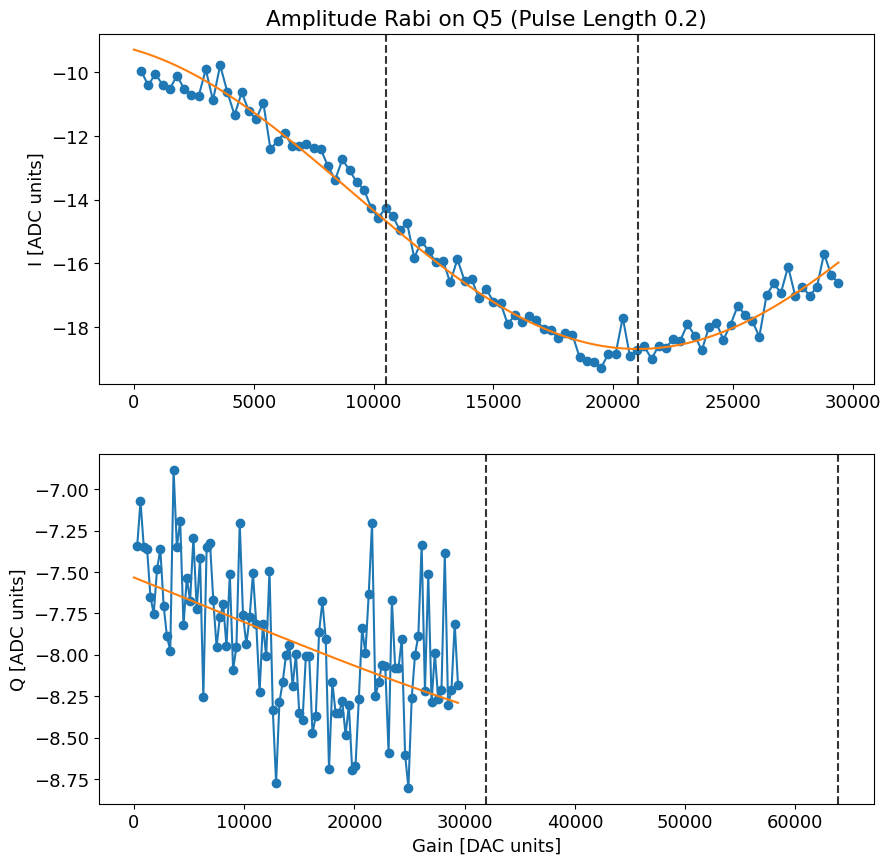

*Set cfg qubit 5 ('pulses', 'pi_ge', 'gain') to 21023 from 20995*


In [73]:
amp_rabi = cfg.make_amprabi(soc, expt_path, cfg_path, i, go=True, gain=15000, im=im)
auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ge','gain'), int(amp_rabi.data['pi_length']), i)

  0%|          | 0/40 [00:00<?, ?it/s]

gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
gauss
Saving C:\_Data\LLqub2\Tuning_2024_05_07\00003_amp_rabi_qubit_chevron4.h5


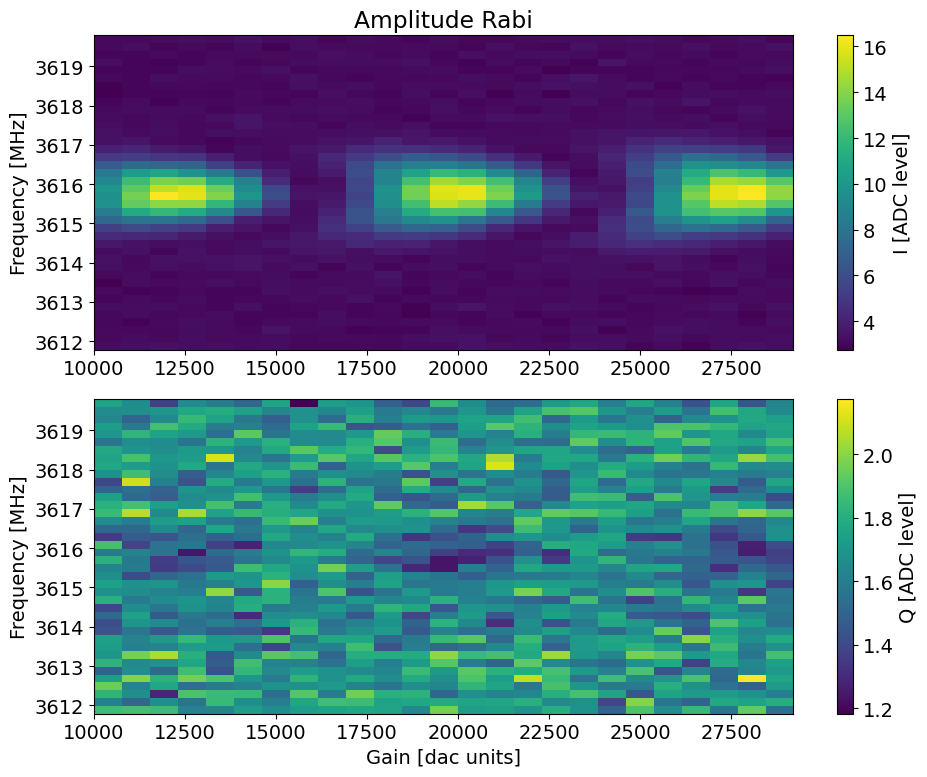

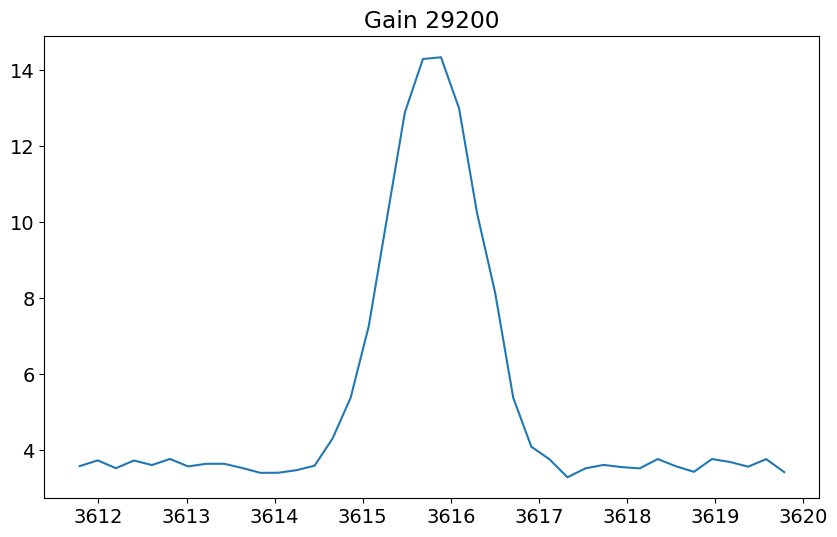

In [57]:
amp_chevron = cfg.make_amprabi_chevron(soc, expt_path, cfg_path, i, sigma=0.4, span_f=8)
amp_chevron.go(analyze=True, display=True, progress=True, save=True)

### Ramsey

  0%|          | 0/2 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_12\00000_ramsey_qubit5.h5
Current pi pulse frequency: 3084.42962
Fit frequency from amps [MHz]: 0.20303726765199356 +/- 0.00013906446025106404
Suggested new pi pulse frequencies from fit amps [MHz]:
 	3084.426582732348
 	3084.026582732348
T2 Ramsey from fit amps [us]: 68.48406007564404
Current pi pulse frequency: 3084.42962
Fit frequency from I [MHz]: 0.20304645842534913 +/- 0.00013237435196318678
Suggested new pi pulse frequency from fit I [MHz]:
 	3084.4265735415747
 	3084.0265735415746
T2 Ramsey from fit I [us]: 70.95389681626665
Fit frequency from Q [MHz]: 0.8364193733117458 +/- 0.0005686282793320322
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3083.7932006266883
 	3083.393200626688
T2 Ramsey from fit Q [us]: 44.7


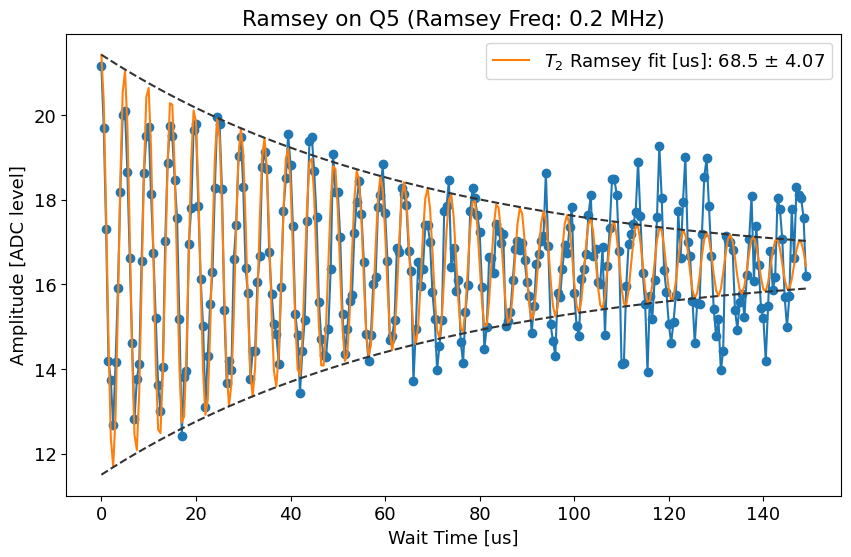

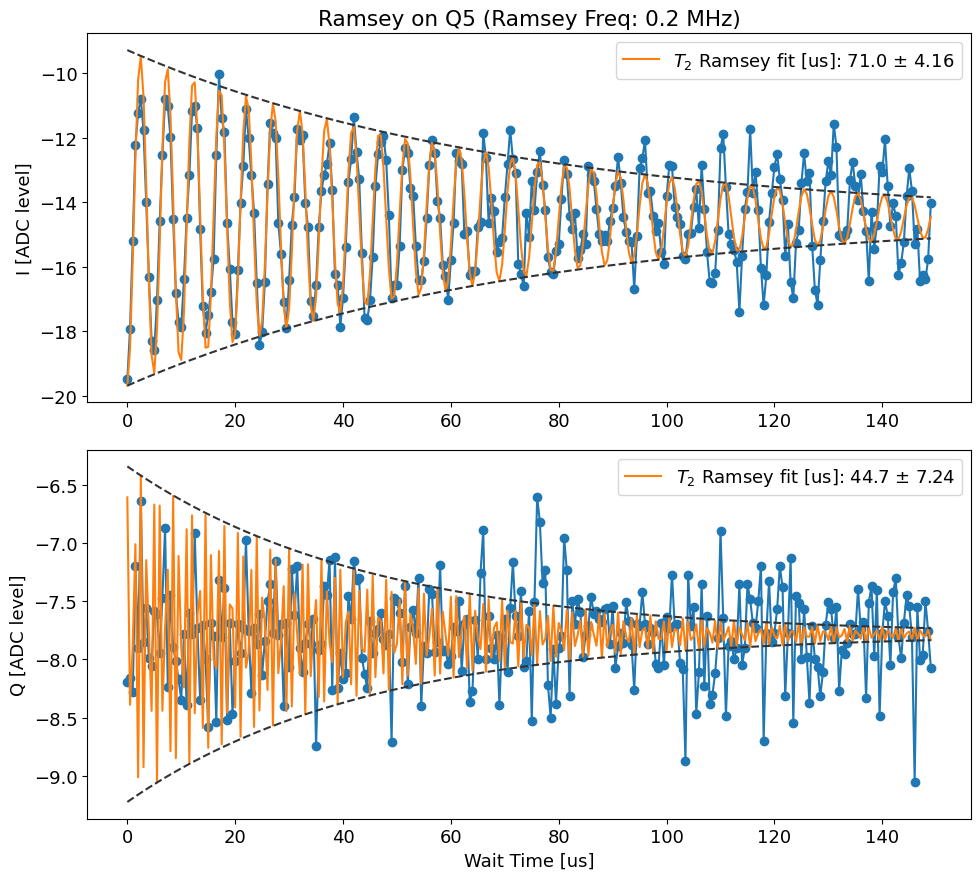

In [74]:
t2r=cfg.make_t2r(soc, expt_path, cfg_path, i, go=True, im=im, ramsey_freq=0.1)
#auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(t2r.data['new_freq']), i)


In [75]:
auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(t2r.data['new_freq']), i)
#t2r.data['new_freq']

*Set cfg qubit 5 f_ge to 3084.4265735415747 from 3084.42962*


### T1

  0%|          | 0/100000 [00:00<?, ?it/s]

t1_i error:fit ratio= 0.03591635169137329
t1_q error:fit ratio= 0.36154531150785163
t1_i is better, saving T1_i to results cfg file
Saving C:\_Data\LLqub2\Tuning_2024_05_12\00000_t1_qubit5.h5
Fit T1 avgi [us]: 109.9181405946411
Fit T1 avgq [us]: 96.44376430193317


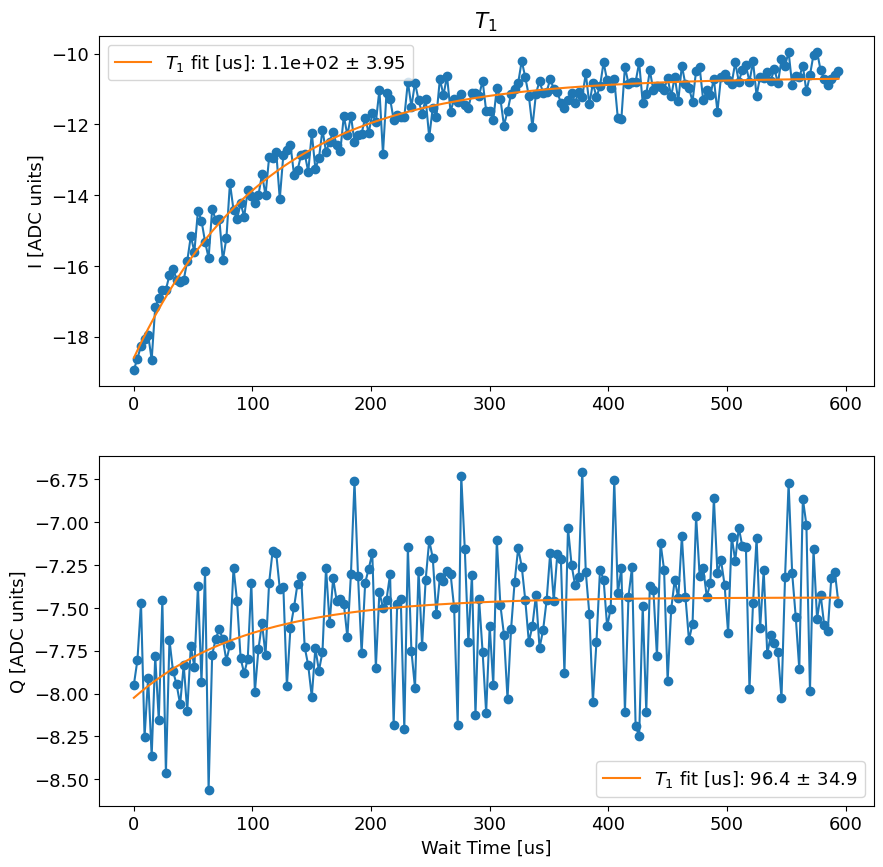

*Set cfg qubit 5 T1 to 109.9181405946411 from 100*


In [76]:
t1 = cfg.make_t1(soc, expt_path, cfg_path, i, go=True, im=im) 
auto_cfg = config.update_qubit(cfg_file, 'T1', float(t1.data['new_t1']), i)

### Single Shot

*Set cfg resonator 5 readout_length to 15 from 12*
<Pyro4.core.Proxy at 0x1441566e5c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_12\00002_single_shot_qubit5.h5
Unrotated:
Ig -8.485897157734867 +/- 5.917392585461807 	 Qg -4.6447168583206775 +/- 4.822580721228806 	 Amp g 9.673874366851216
Ie -18.838468214363203 +/- 5.500877058511357 	 Qe -7.856693425905837 +/- 4.710560231325886 	 Amp e 20.41116156058358
hi
Rotated:
Ig 9.386007975332166 +/- 5.917392585461807 	 Qg 1.8371569232791525 +/- 4.822580721228806 	 Amp g 9.56411476686429
Ie 20.422935369256336 +/- 5.500877058511357 	 Qe 1.9995565896176775 +/- 4.710560231325886 	 Amp e 20.520587604937266


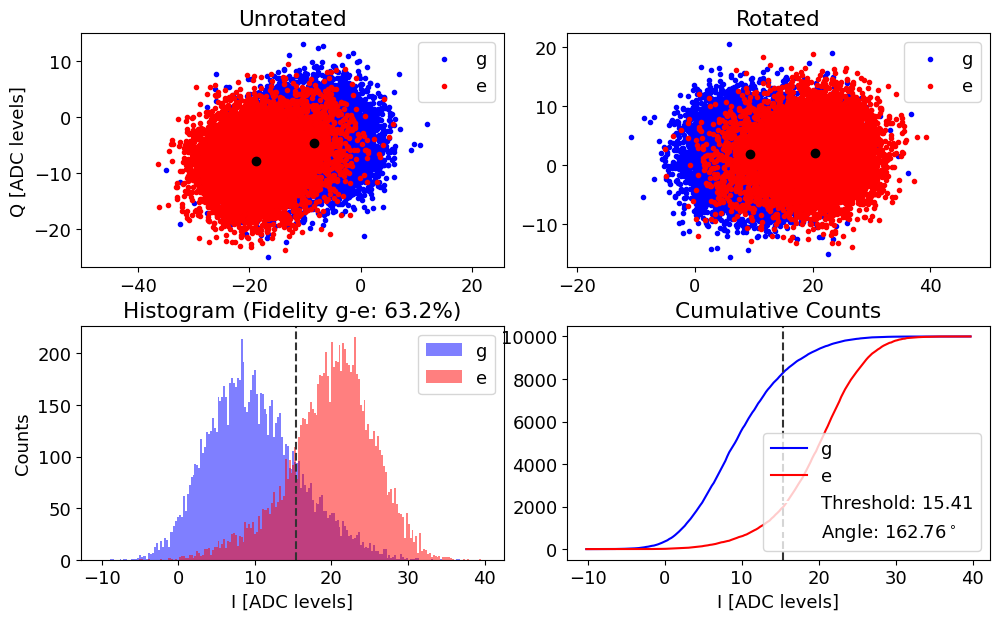

ge fidelity (%): 63.173158657932895
rotation angle (deg): 162.76303521417267
threshold ge: 15.406207391502365
*Set cfg resonator 5 phase to 162.76303521417267 from 164.43635168079444*
*Set cfg resonator 5 threshold to 15.406207391502365 from 15.335344284482899*


In [81]:
# Single shot 
#config.update_readout(cfg_file, 'gain', 8000, i)
config.update_readout(cfg_file, 'readout_length',15,i)
shot = cfg.make_singleshot(soc, expt_path, cfg_path, i, go=True)
config.update_readout(cfg_file, 'phase', float(shot.data['angle']), i);
config.update_readout(cfg_file, 'threshold', float(shot.data['thresholds'][0]), i);

### Echo

  0%|          | 0/2 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00007_echo_qubit4.h5
Current qubit frequency: 3615.7866097899796
Fit frequency from I [MHz]: 0.2833889985203809 +/- 0.00015460773893682624
T2 Echo from fit I [us]: 167.16
Fit frequency from Q [MHz]: 0.01993426229942816 +/- 8.181909407692877e-05
T2 Echo from fit Q [us]: 186.18824545564206


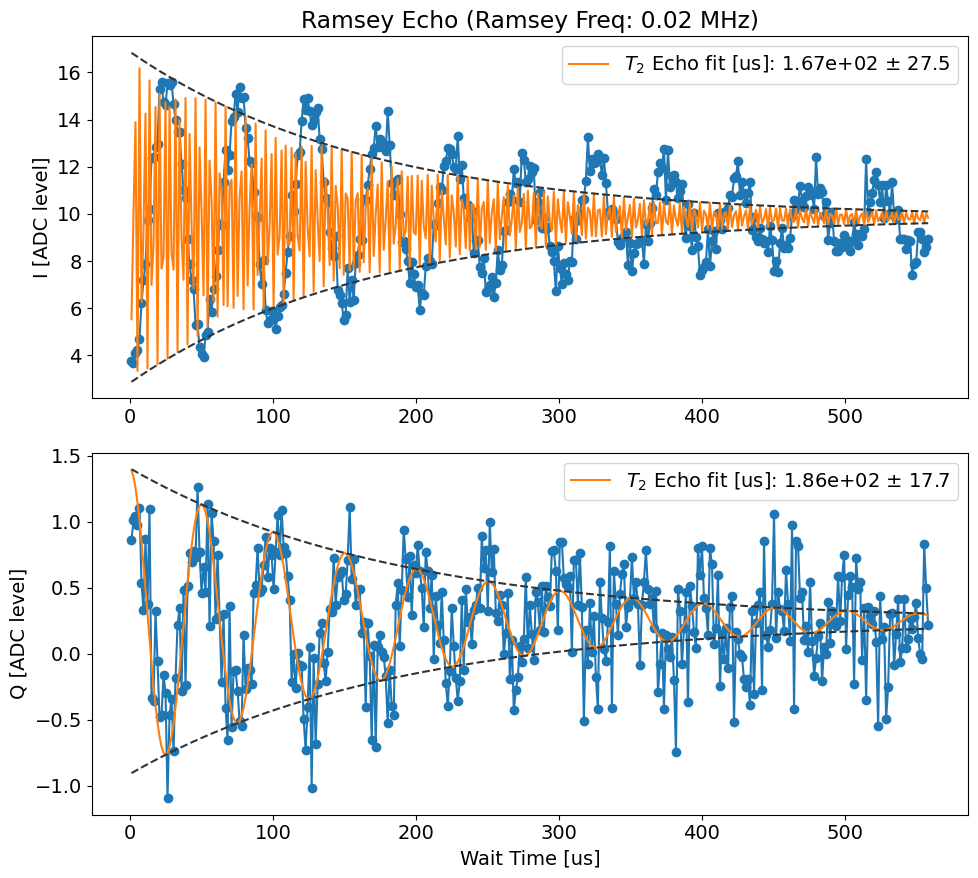

In [101]:
t2e = cfg.make_t2e(soc, expt_path, cfg_path, i, ramsey_freq=0.02, step=1.4, npts=400)
t2e.go(analyze=True, display=True, progress=True, save=True)

### Readout opt 

In [110]:
shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, reps=20000, npts_f=7, npts_gain=7, npts_len=7)
shotopt.go(analyze=False, display=False, progress=True, save=True)

  0%|          | 0/7 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d99d060; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7dea70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d8463b0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d881ab0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7f62c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7dc790; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d81e290; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d883e20; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d81d600; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d881e10; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d81f490; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7f6aa0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d845f90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d846aa0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6f59c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d81f100; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6f4e50; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7f48e0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7dc640; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6b44c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6f4d30; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6b5600; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6f5750; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7147f0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6ccc70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7de590; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6b7e50; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d63e860; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6cf9a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6cece0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d12ac50; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bd7a860; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6cf010; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6b7c40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7149a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6b6e60; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d12ab60; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ec6ad40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d123df0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d715e10; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d12bc40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d75eaa0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ec6abf0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1dbc40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d122530; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1b90f0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d63d9c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d21db10; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1bb310; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d121d50; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d5c0190; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d63ffd0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1b83d0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d5e8a60; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1b97b0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1dabf0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1fd780; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d5c2aa0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d5e8610; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d21fdf0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d5e9540; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d5ea350; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1bb730; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b0b7e50; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b0b7d90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1da3e0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b058d90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1d8190; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b059c30; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1ff970; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be2de70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c4e6860; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be69f30; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1ff970; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188a2a590; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1fff70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be68be0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1889e2530; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be6ae00; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b019ba0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1889e24a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be6bc70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18682ac80; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1869d3340; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18682b8e0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1889e31c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c4e7fd0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b187410340; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1889e20e0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be2d8a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1874125c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c4e7040; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be2e530; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188a29330; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18afeb400; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b187d187c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e34e50; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c4e6380; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18839f1c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186800a60; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18839e170; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e34040; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18839fbe0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b039330; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e4c0a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18afea7a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c04add0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18afe8700; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e37430; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c45eec0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b1c6620; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1883b4310; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1883b7fd0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d97e4a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188d37be0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e4eb90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188d36230; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e4f1c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b1c4040; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b0a85b0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d97d8d0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b0abcd0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b1722f0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188b7d570; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188337340; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188336590; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c582740; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186c30100; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b1c7dc0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b0a9570; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b1c6c20; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188dbbcd0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c45f640; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b0a97b0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b171990; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c5820b0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188166ad0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188db9f90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186863a30; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186c32890; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188cf80a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b431e40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e4ebf0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d9c3070; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c583fd0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e4ebf0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e34c70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1879a79d0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b0a8100; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b173a00; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1888d2050; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186c32a40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188bae2c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186c32a40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e34c70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188db93f0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b431870; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186c33460; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b187ccb2b0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188199b10; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b0ab6d0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188dba7d0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186c5f340; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18750f8e0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188170a60; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bf89420; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bf8b730; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e69270; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188386b00; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bf89420; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e68130; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188171030; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186c31060; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188e69de0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188bad690; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b2b2500; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b2b2380; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18750ddb0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b1fc3a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b26b610; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b26b5e0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b2b3820; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b2b0100; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b187949390; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18685cdf0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188170850; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18681aa10; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c7399f0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b26a020; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18681a1d0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18681a2c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1878483a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b187948490; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186c5f190; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18750ddb0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18831f0d0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b1fd3c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18784b670; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b1fe9e0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c041de0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188170310; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1879497b0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18794a470; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b4ede70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b2e3dc0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18af792d0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b4ef970; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186c37820; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18af7b670; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18794b370; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188ea6d40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7f54e0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7f70d0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6b7c70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c705480; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d847640; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d845360; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d1b82e0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d75d930; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d75ec20; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186829e10; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d6b6740; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be6b880; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b187410760; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d63c190; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c72bd90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18afeb040; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d21d330; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b01bbb0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b038a90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c049240; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1889e3820; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18839f670; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d7167a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ec69150; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d97b5b0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ec210f0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ec68e50; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ec22ad0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c5293f0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ec6b190; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d978e80; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18cdca7a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c549990; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18cd7aec0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ec20a90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ec21330; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c52a200; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18cdc9540; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b187d19000; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18cd7a470; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18eb712a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18cd7b7c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d98b520; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18cd7aa70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18cd95780; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18734f340; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188b9dae0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1873bbd90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c54bfd0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c78d4e0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1873b84c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186c97490; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d98aaa0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188deb820; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c54ba60; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18af79270; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18734dea0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ce0de70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b187d51900; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c78ece0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b07add0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186c34fa0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18734c940; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18eb72080; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18cd94100; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18eb73f40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b21dff0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b07ad70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188b6fd90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bde1f60; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b21cdc0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bda54b0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bfd6230; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b186a66050; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bfd5b40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188bed390; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bde19c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bff7fd0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18682d3c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18682dff0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b21d330; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b21e110; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bff7850; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b1867a7bb0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bd12110; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c66ba00; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18613a860; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188bed0c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18739f670; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b28eef0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bde0d30; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bce8730; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188bd0a30; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18bcea920; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c668310; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b187d13700; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18739dc00; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ce2f400; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c668580; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188bd1090; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b28fee0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188bd3bb0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188bd0d30; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be53130; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ce2cc70; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18b28eb90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18ce2d450; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18eb02a10; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18eb32860; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18eb02f80; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be51330; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c41f130; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c564940; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be52740; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18eb30d90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c567850; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c41ff40; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18eb02e90; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b188bb58a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be53e80; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c486b30; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c5676a0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18eb00730; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18be507f0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d737e80; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18eb32890; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18eb328c0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c438f10; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d99c880; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18c5640d0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d737e20; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset
<Pyro4.core.Proxy at 0x2b18d99cfd0; not connected; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>


  0%|          | 0/20000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/20000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00004_single_shot_opt_qubit4.h5


In [79]:
#shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, im=im, reps=10000, npts_f=1, npts_gain=5, npts_len=5, start_gain=6000, span_gain=4500, start_len=12, span_len=25)
shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, im=im, reps=10000, npts_f=6, span_f=0.7, npts_gain=1, npts_len=5, start_len=12, span_len=25)

shotopt.go(analyze=False, display=False, progress=False, save=True)


<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d

In [82]:
shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, im=im, reps=10000, npts_f=12, span_f=0.7, npts_gain=1, npts_len=1, start_len=12, span_len=25)

shotopt.go(analyze=False, display=False, progress=False, save=True)

<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d30; connected IPv4; for PYRO:obj_0b383c471de34392bd36db88d1a439d4@192.168.137.233:41435>
<Pyro4.core.Proxy at 0x144108a4d

### Rabi EF / qubit temperature

qTest sigma =  0.1
gauss


  0%|          | 0/2 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_07\00001_amp_rabi_EF_ge_qubit4.h5
Pi gain from amps data [dac units]: 15919
	Pi/2 gain from amps data [dac units]: 7959
Pi gain from avgi data [dac units]: 15907
	Pi/2 gain from avgi data [dac units]: 7953
Pi gain from avgq data [dac units]: 16307
	Pi/2 gain from avgq data [dac units]: 8153


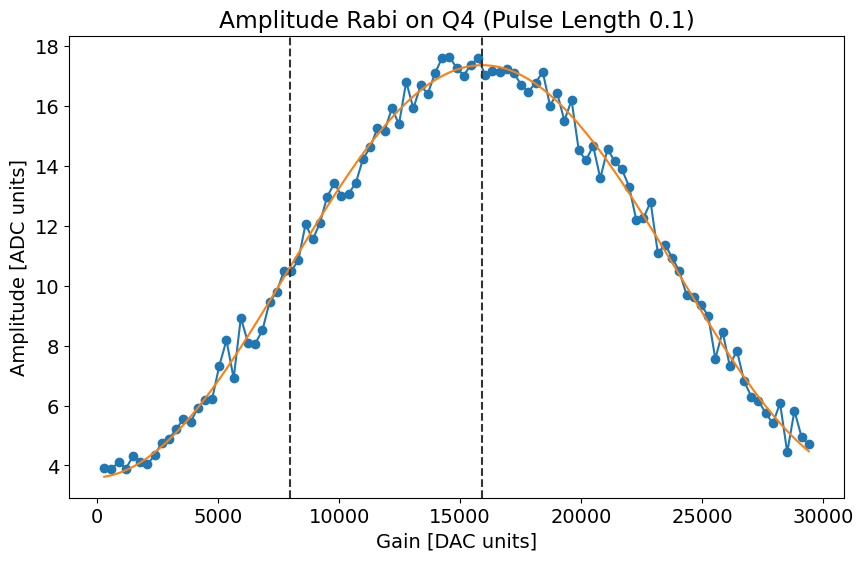

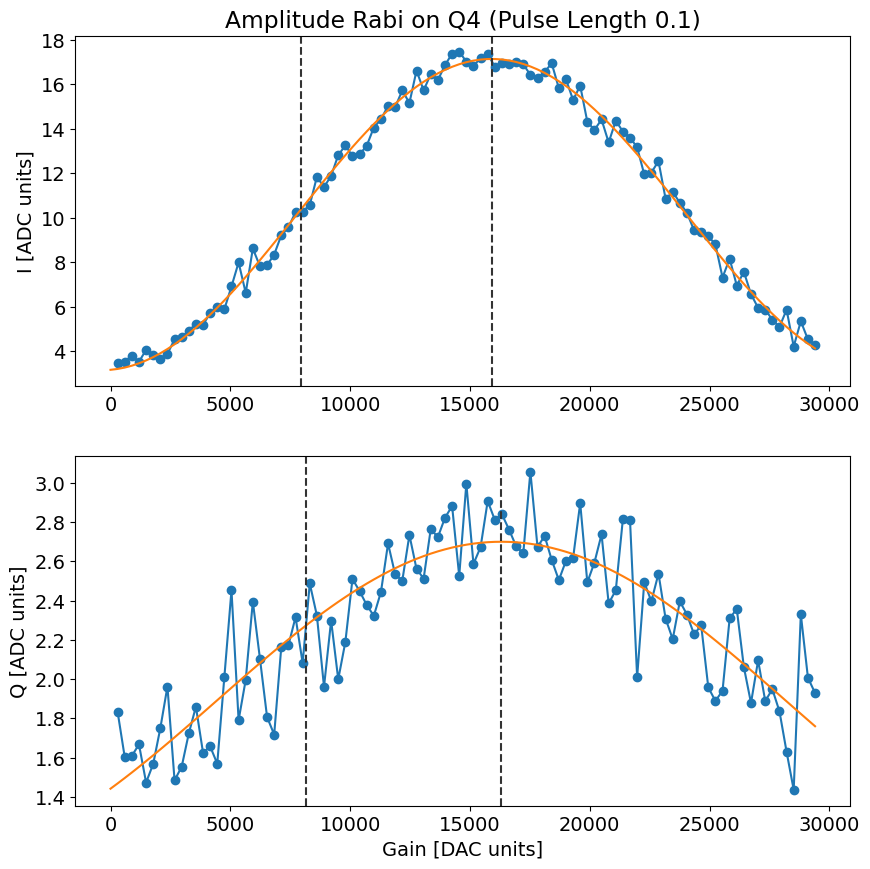

In [42]:
# Rabi ef
rabief=cfg.make_amprabiEF(soc, expt_path, cfg_path, i, go=True, pulse_ge=True)

rabief_nopulse=cfg.make_amprabiEF(soc, expt_path, cfg_path, i, go=True, pulse_ge=False)
#auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ef','gain'), int(rabief.data['pi_length']), i)

h = 6.62607015e-34
fge = 1e6*amprabiEF.cfg.device.qubit.f_ge[i]
kB = 1.380649e-23
################

print('Qubit temp [mK]:', 1e3*-h*fge/(kB*np.log(rabief['fit_amps'][0]/rabief_nopulse['fit_amps'][0])))


In [84]:
amp_rabi.data

{'xpts': array([    0,   300,   600,   900,  1200,  1500,  1800,  2100,  2400,
         2700,  3000,  3300,  3600,  3900,  4200,  4500,  4800,  5100,
         5400,  5700,  6000,  6300,  6600,  6900,  7200,  7500,  7800,
         8100,  8400,  8700,  9000,  9300,  9600,  9900, 10200, 10500,
        10800, 11100, 11400, 11700, 12000, 12300, 12600, 12900, 13200,
        13500, 13800, 14100, 14400, 14700, 15000, 15300, 15600, 15900,
        16200, 16500, 16800, 17100, 17400, 17700, 18000, 18300, 18600,
        18900, 19200, 19500, 19800, 20100, 20400, 20700, 21000, 21300,
        21600, 21900, 22200, 22500, 22800, 23100, 23400, 23700, 24000,
        24300, 24600, 24900, 25200, 25500, 25800, 26100, 26400, 26700,
        27000, 27300, 27600, 27900, 28200, 28500, 28800, 29100, 29400,
        29700]),
 'avgi': array([ -9.600311  ,  -9.94757319, -10.40866363, -10.0393702 ,
        -10.40103969, -10.51970332, -10.09881718, -10.52486272,
        -10.72363565, -10.75574366,  -9.90788289, -10.8810

## Automated retune once things are working

[autoreload of experiments.single_qubit.t2_echo failed: Traceback (most recent call last):
  File "c:\Users\slab\anaconda3\envs\slab\lib\site-packages\IPython\extensions\autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\slab\anaconda3\envs\slab\lib\site-packages\IPython\extensions\autoreload.py", line 471, in superreload
    module = reload(module)
  File "c:\Users\slab\anaconda3\envs\slab\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "c:\_Lib\python\rfsoc\elaine_rfsoc\slab_rfsoc_expts\experiments\single_qubit\t2_echo.py", line 201, in <module>
    class RamseyEchoExperiment(Experiment):
  File "c:\_Lib\python\rfsoc\elaine_rfsoc\slab_rfsoc_expts\experiments\single_qubit\t2_echo.py", line 

qTest sigma =  0.10756321530046402
gauss


  0%|          | 0/50000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\Tuning_2024_05_12\00000_amp_rabi_qubit0.h5
Pi gain from amps data [dac units]: 15533
	Pi/2 gain from amps data [dac units]: 7766
Pi gain from avgi data [dac units]: 15492
	Pi/2 gain from avgi data [dac units]: 7746
Pi gain from avgq data [dac units]: 15563
	Pi/2 gain from avgq data [dac units]: 7781


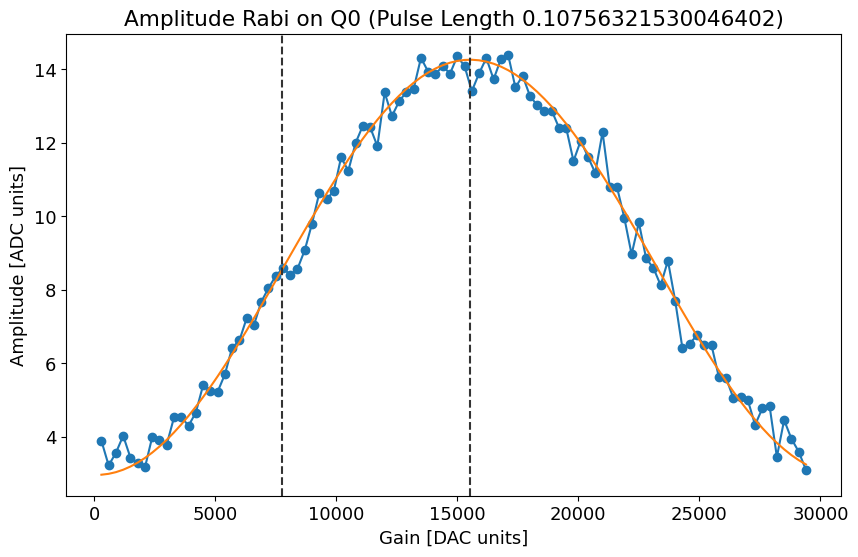

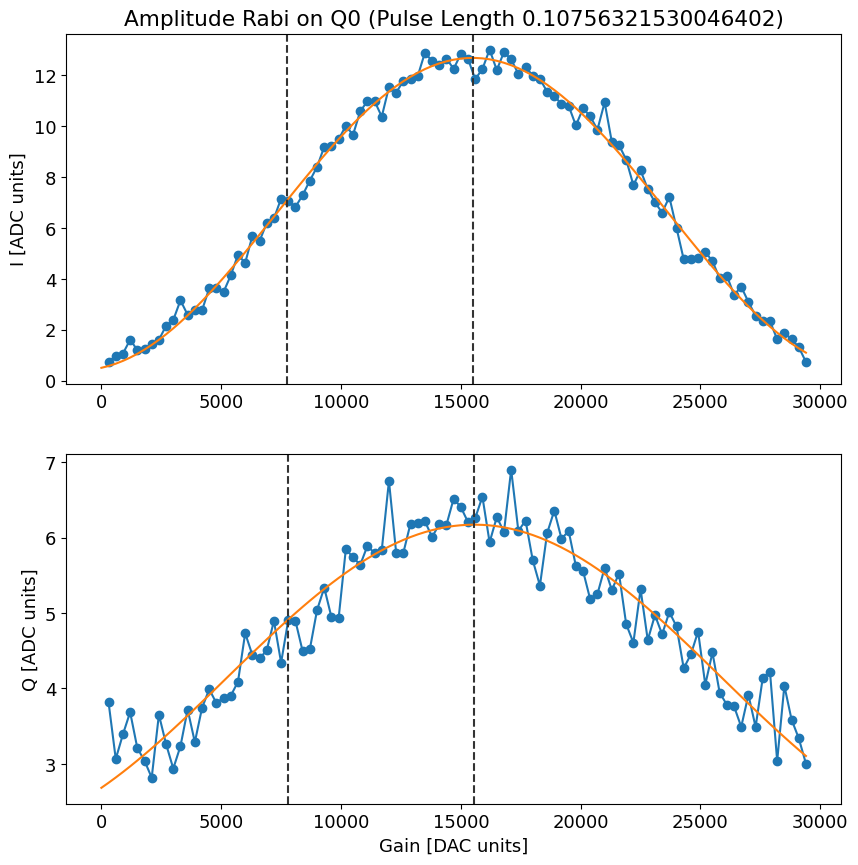

*Set cfg qubit 0 ('pulses', 'pi_ge', 'gain') to 15492 from 15638*


In [54]:
shot = cfg.make_singleshot(soc, expt_path, cfg_path, i, go=True)
config.update_readout(cfg_file, 'phase', float(shot.data['angle']), i);
config.update_readout(cfg_file, 'threshold', float(shot.data['thresholds'][0]), i);

amp_rabi = cfg.make_amprabi(soc, expt_path, cfg_path, i, go=True, gain=15000)
auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ge','gain'), int(amp_rabi.data['pi_length']), i)

t2r=cfg.make_t2r(soc, expt_path, cfg_path, i, go=True)
auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(t2r.data['new_freq']), i)

t1 = cfg.make_t1(soc, expt_path, cfg_path, i, go=True) 
auto_cfg = config.update_qubit(cfg_file, 'T1', float(t1.data['new_t1']), i)

t2e = cfg.make_t2e(soc, expt_path, cfg_path, i,go=True, ramsey_freq=0.02, step=1.4, npts=400)